# Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score,LeaveOneOut
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_curve,roc_auc_score,precision_recall_curve,auc


In [2]:
# Abrindo os dados
df = pd.read_csv("dataset/Heart_Attack_Data_Set.csv")
# Escolhendo essa paleta de cores
sns.set_palette("muted")

# Como estão meus dados ? 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Explicação dos atributos:  

### **1. age**: Idade em anos.  
### **2. sex**: Sexo (1 = masculino; 0 = feminino).  
### **3. cp**: Tipo de dor no peito.  
- Valor 1: Angina típica  
- Valor 2: Angina atípica  
- Valor 3: Dor não anginosa  
- Valor 4: Assintomático  
### **4. trestbps**: Pressão arterial em repouso (em mm Hg na admissão hospitalar).  
### **5. chol**: Colesterol sérico em mg/dL.  
### **6. fbs**: Glicose em jejum (> 120 mg/dL) (1 = verdadeiro; 0 = falso).  
### **7. restecg**: Resultados do eletrocardiograma em repouso.  
- Valor 0: Normal  
- Valor 1: Anormalidade na onda ST-T (inversões da onda T e/ou depressão do segmento ST).  
### **8. thalach**: Frequência cardíaca máxima atingida.  
### **9. exang**: Angina induzida por exercício (1 = sim; 0 = não).
### **10. oldpeak** = Refere-se a um valor relacionado à depressão do segmento ST no eletrocardiograma (ECG) durante um teste de esforço (exercício), comparado com o repouso  
### **11. slope**: Inclinação do segmento ST no pico do exercício.  
- Valor 1: Ascendente  
- Valor 2: Plano  
- Valor 3: Descendente  
### **12. ca**: Número de vasos sanguíneos principais (0-3) coloridos por fluoroscopia.  
### **13. thal**: Uma doença genética que afeta a habilidade de produzir hemoglobina.  
- Valor 3: Normal  
- Valor 6: Defeito fixo  
- Valor 7: Defeito reversível  
### **target**: Variável alvo (1 = com doença; 0 = sem doença)



In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Observações:
- Os pacientes tem ume média de mediana de idade próximo aos 55 anos, o que pode indicar pacientes mais velhos.
- Parece que a maioria dos paciente possuem angina típica, que é uma dor ou deconforto no peito, quando se faz exercícios físicos ou estresse.

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


## Observações:
- Não parece haver problemas de falta de dados.
- Há apenas uma linha duplicada,que é uma linha seguida da outra, então removerei uma delas.

In [10]:
df.drop_duplicates(keep=False, inplace=True)

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
# Separando as colunas e cada tipo
categorical_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numerical_features = df.drop(columns=categorical_features + ['target']).columns

print(f"Essas são as variáveis categoricas qntd {len(categorical_features)}:\n {categorical_features}")
print(f"Essas são as variáveis numéricas qntd {len(numerical_features)}:\n {numerical_features}")

Essas são as variáveis categoricas qntd 8:
 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Essas são as variáveis numéricas qntd 5:
 Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')


In [13]:
X = df.drop(columns=['target'])
y = df['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
df_train = pd.concat([X_train,y_train],axis=1)

In [14]:
for categorical in categorical_features:
    print('-'*20)
    print(df_train[categorical].value_counts(normalize=True))

--------------------
sex
1    0.679167
0    0.320833
Name: proportion, dtype: float64
--------------------
cp
0    0.479167
2    0.283333
1    0.175000
3    0.062500
Name: proportion, dtype: float64
--------------------
fbs
0    0.858333
1    0.141667
Name: proportion, dtype: float64
--------------------
restecg
1    0.508333
0    0.475000
2    0.016667
Name: proportion, dtype: float64
--------------------
exang
0    0.6625
1    0.3375
Name: proportion, dtype: float64
--------------------
slope
2    0.475
1    0.450
0    0.075
Name: proportion, dtype: float64
--------------------
ca
0    0.579167
1    0.225000
2    0.112500
3    0.070833
4    0.012500
Name: proportion, dtype: float64
--------------------
thal
2    0.533333
3    0.404167
1    0.058333
0    0.004167
Name: proportion, dtype: float64


## Observações:
- A maioria da categorias já veio codificada, mas precisamos modificar isso para o modelo, a única característica que a gente pode manter a cardinalidade é o 'slope'
- Vamos modificar para a codificação das que não são binárias para target enconder, para não tornar a matriz muito sparsa.

# EDA

C:\Windows\Temp\ipykernel_17704\2932455632.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


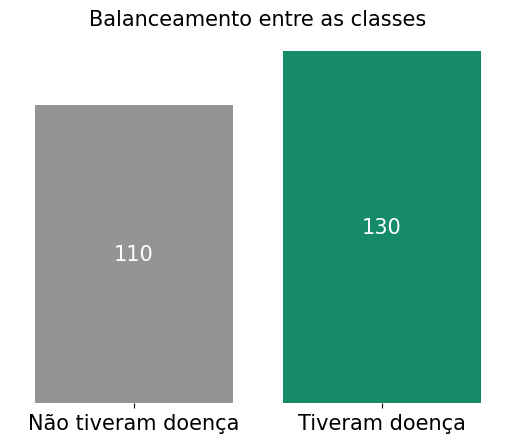

In [15]:
df_heart_disease = df_train['target'].value_counts()
df_heart_disease = df_heart_disease.reset_index()

ax = sns.barplot(x='target',y='count',data=df_heart_disease,palette=['#949494','#029E73'],hue='target',legend=False)
ax.set_xlabel('')
ax.yaxis.set_visible(False)
ax.set_title('Balanceamento entre as classes',fontsize=15)
ax.set_xticks(range(2),['Não tiveram doença','Tiveram doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.legend().set_visible(False)

for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
    y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
    ax.text(x, y, f'{height:.0f}', ha='center', va='center', fontsize=15, color='white')
    

In [22]:
sns.palettes.SEABORN_PALETTES

{'deep': ['#4C72B0',
  '#DD8452',
  '#55A868',
  '#C44E52',
  '#8172B3',
  '#937860',
  '#DA8BC3',
  '#8C8C8C',
  '#CCB974',
  '#64B5CD'],
 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'],
 'muted': ['#4878D0',
  '#EE854A',
  '#6ACC64',
  '#D65F5F',
  '#956CB4',
  '#8C613C',
  '#DC7EC0',
  '#797979',
  '#D5BB67',
  '#82C6E2'],
 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'],
 'pastel': ['#A1C9F4',
  '#FFB482',
  '#8DE5A1',
  '#FF9F9B',
  '#D0BBFF',
  '#DEBB9B',
  '#FAB0E4',
  '#CFCFCF',
  '#FFFEA3',
  '#B9F2F0'],
 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'],
 'bright': ['#023EFF',
  '#FF7C00',
  '#1AC938',
  '#E8000B',
  '#8B2BE2',
  '#9F4800',
  '#F14CC1',
  '#A3A3A3',
  '#FFC400',
  '#00D7FF'],
 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'],
 'dark': ['#001C7F',
  '#B1400D',
  '#12711C',
  '#8C0800',
  '#591E71',
  '#592F0D',
  '#A23582',
  '#3C3C3C',
  '#B8850A

In [23]:
sns.color_palette("muted")

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [24]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [25]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

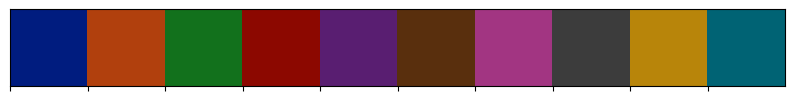

In [26]:
sns.palplot(sns.color_palette("dark"))

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

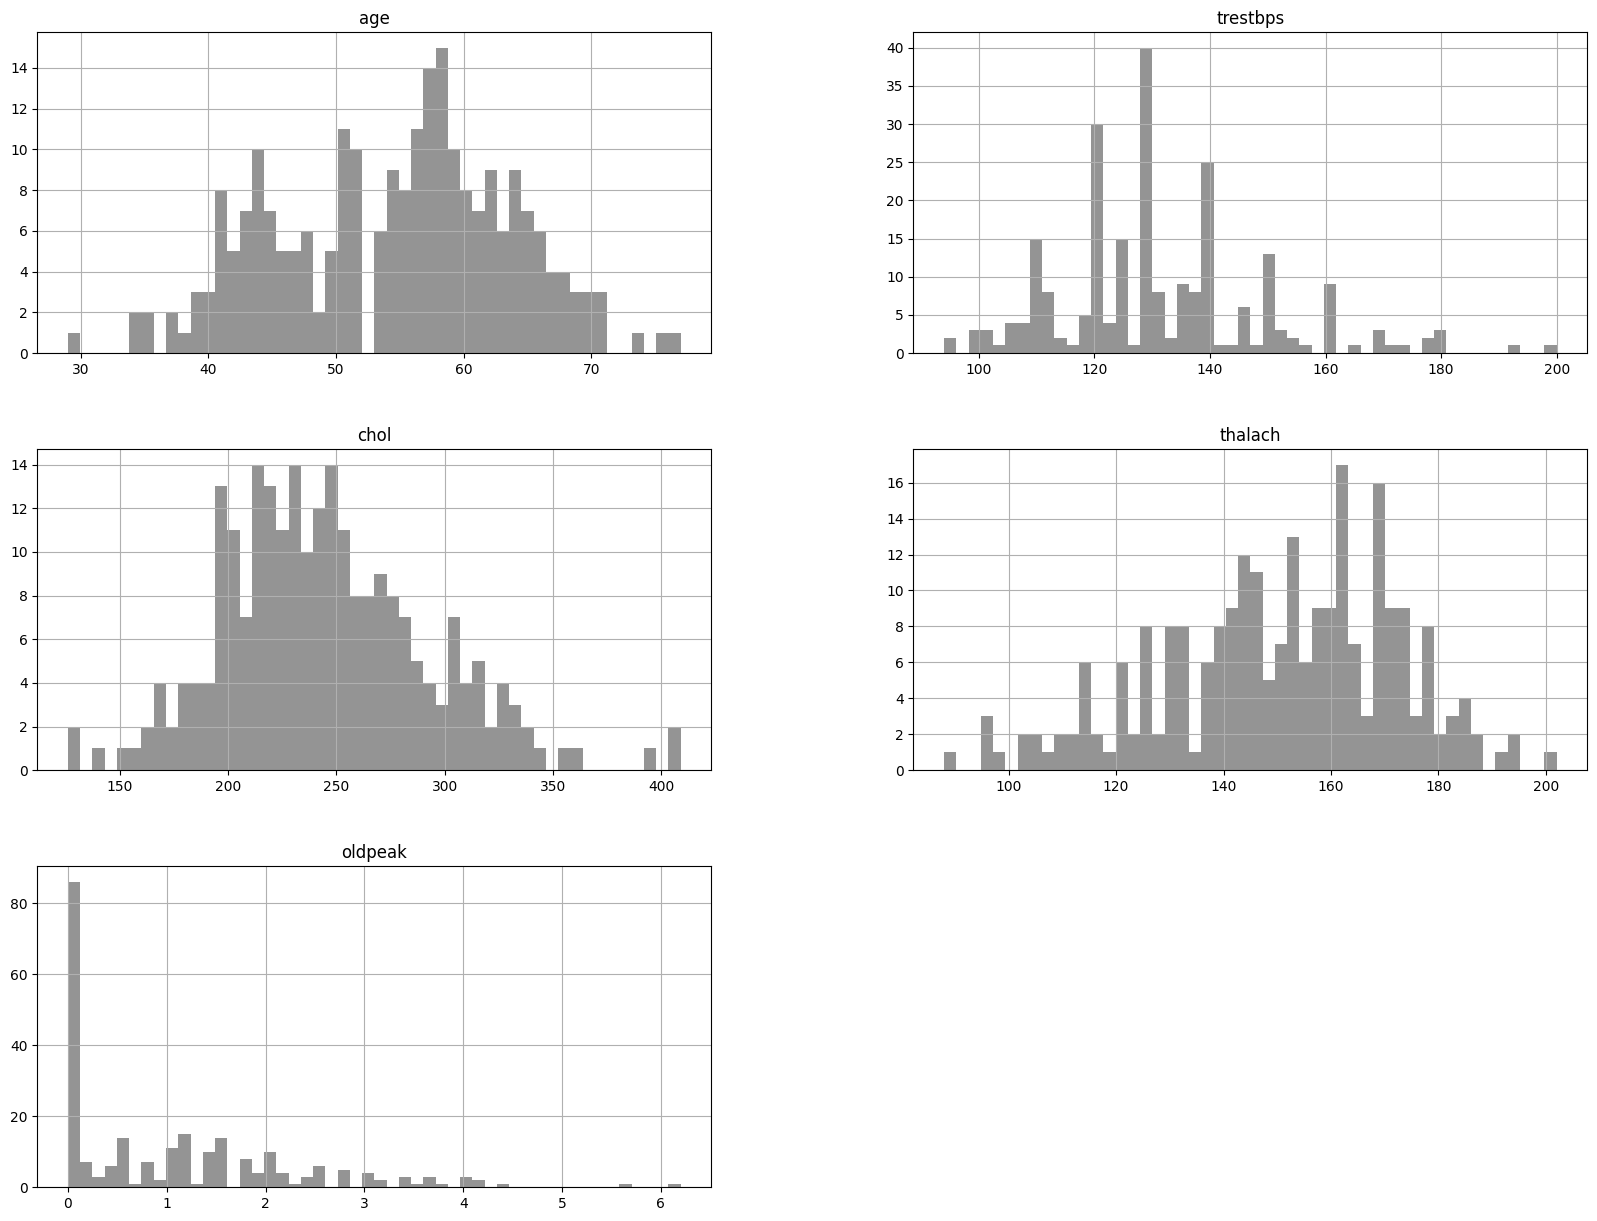

In [27]:
df_train[numerical_features].hist(bins=50, figsize=(20,15),color='#949494')

## Observações : 
- A maioria dos pacientes tem entre 40 e 50 anos.
- A maioria tem um oldpeak baixo, vamos ver em seguida como isso fica representado separando entre a classe target. 


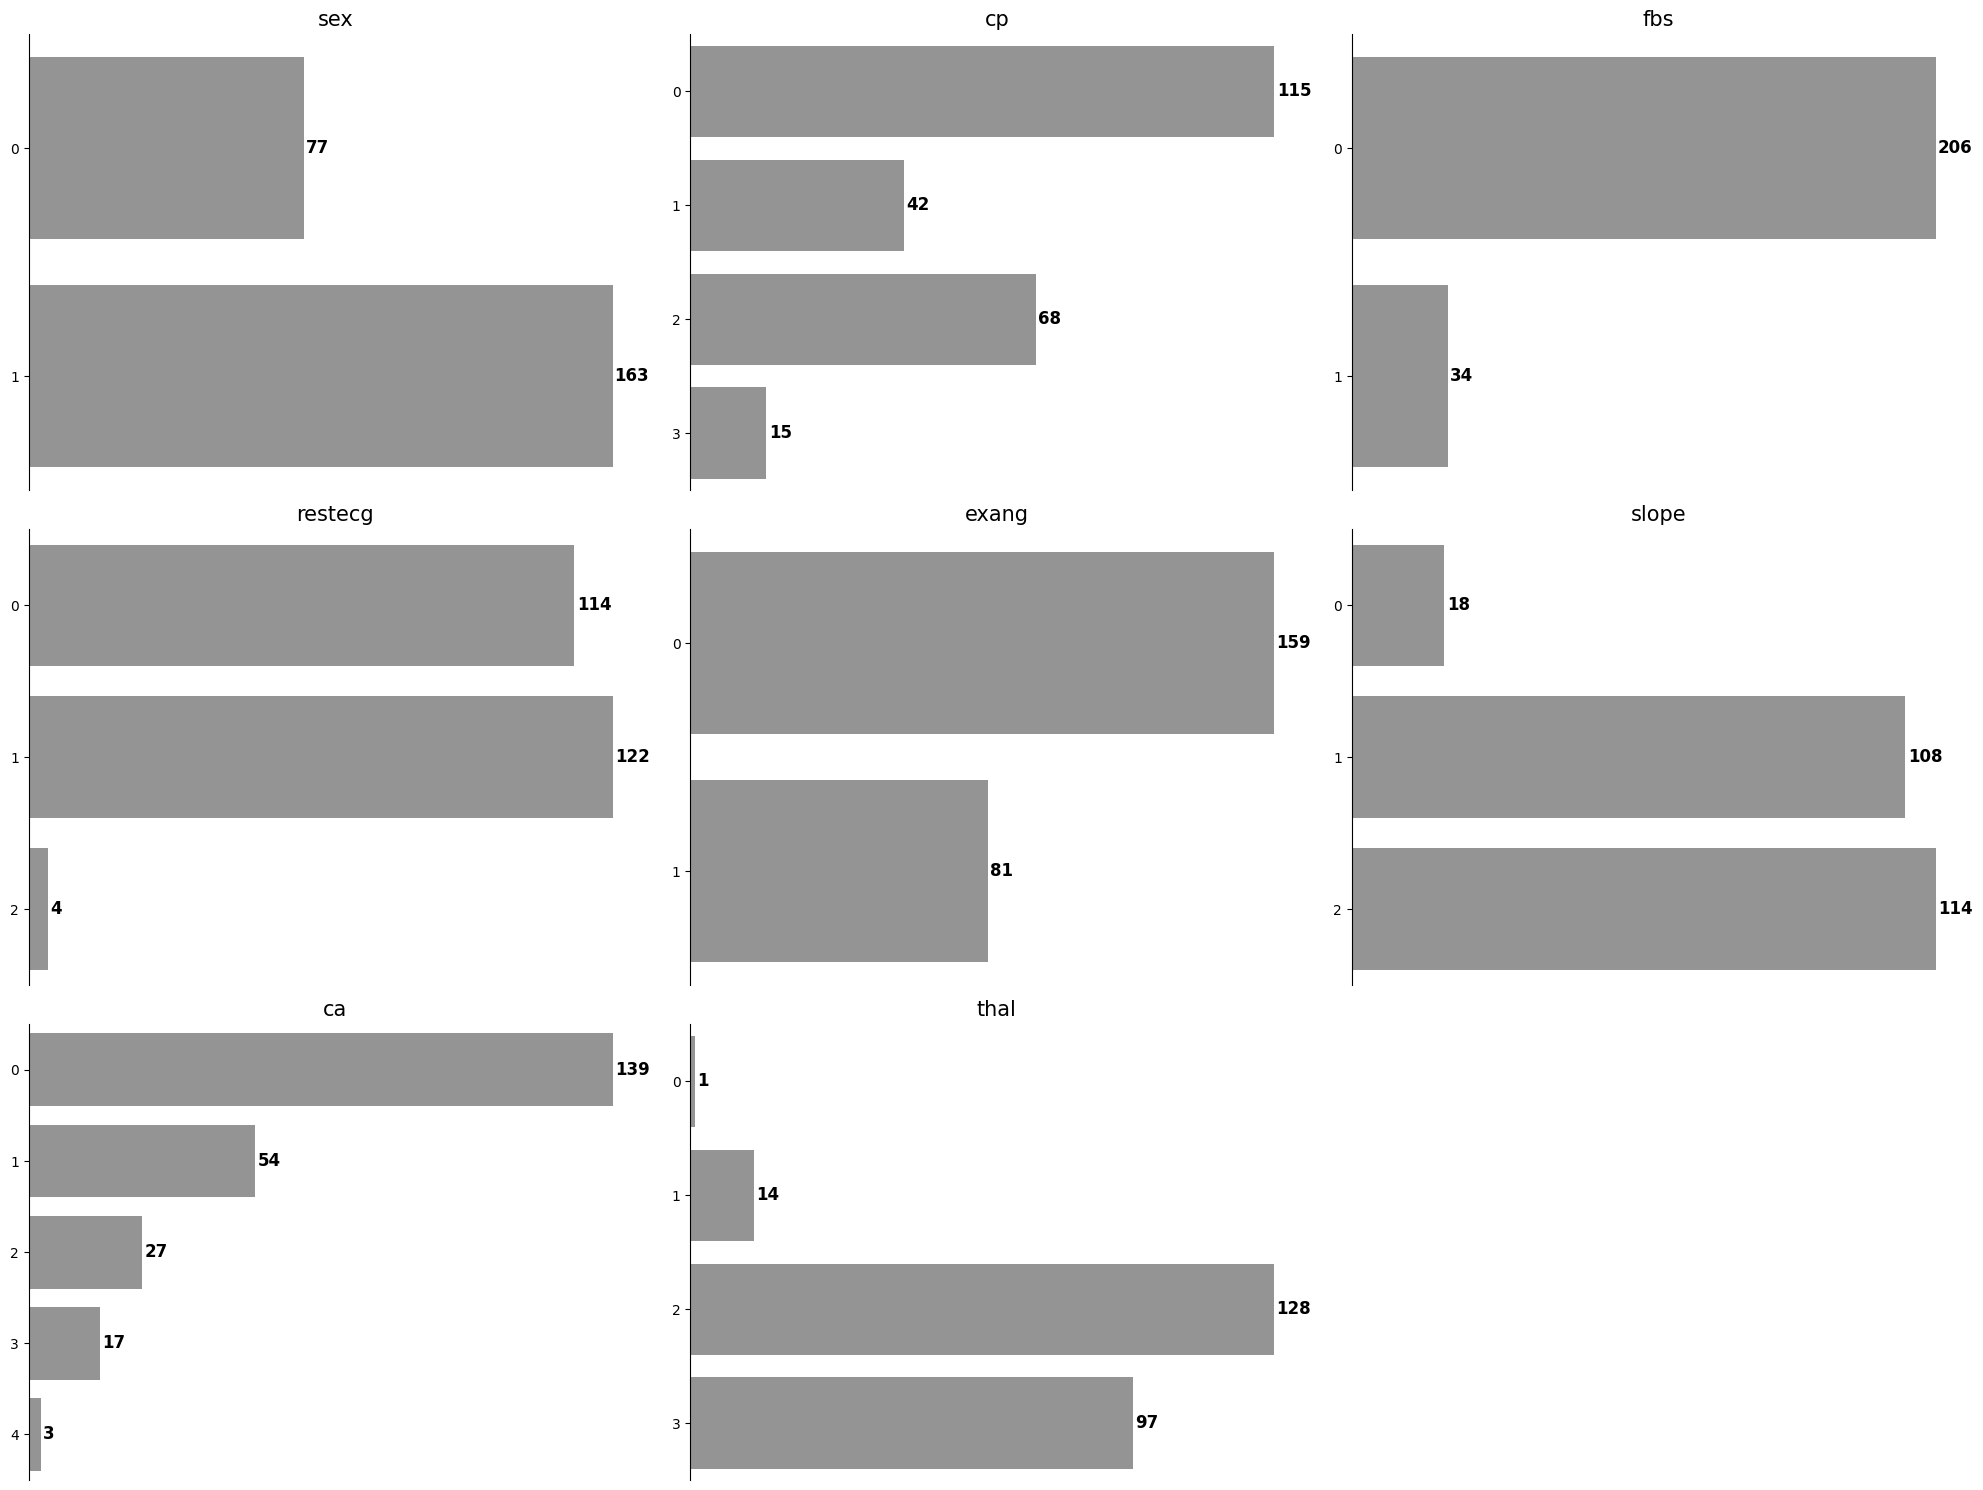

In [28]:
num_vars = len(categorical_features)
num_cols = 3 
num_rows = (num_vars // num_cols) + (1 if num_vars % num_cols != 0 else 0)

# Criando uma figura com subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

# Loop para plotar cada variável categórica
for num, feature in enumerate(categorical_features):
    sns.countplot(y=feature, data=df_train, ax=axes[num],color='#949494')
    axes[num].set_title(f'{feature}',fontsize= 15)
    axes[num].set_xlabel("")
    axes[num].set_ylabel("")
    axes[num].spines["top"].set_visible(False) 
    axes[num].spines["right"].set_visible(False) 
    axes[num].spines["bottom"].set_visible(False) 
    axes[num].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
     

    for bar in axes[num].patches:
        count = bar.get_width()
        x = count + 0.5  # Centralizar o rótulo na barra
        y = bar.get_y() + bar.get_height() / 2  # Centralizar o rótulo verticalmente
        axes[num].text(x, y, f'{int(count)}', ha='left', va='center', fontsize=12, color='black',fontweight='bold')    

# Removendo gráficos vazios
for i in range(num_vars, len(axes)):  
    axes[i].axis("off")

plt.tight_layout()
plt.show() 

## Observações:
- A maioria das pessoas não apresentaram a glicose maior que 120 ml /dl, um valor maior que esse pode ser considerado diabetes.
- Ta um pouco estranho o thal pois aparentemente seriam encontrados os valores 3,6 e 7 mas foi mostrado 4 classes, provavelmente deve haver um erro na categoria 0.

In [16]:
# Dando uma conferida na base para saber se há mais algum dado com esse thal 0
df[df['thal']==0]
# Vou verificar mais para frente se ela seria importante para decidir entre as classes


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


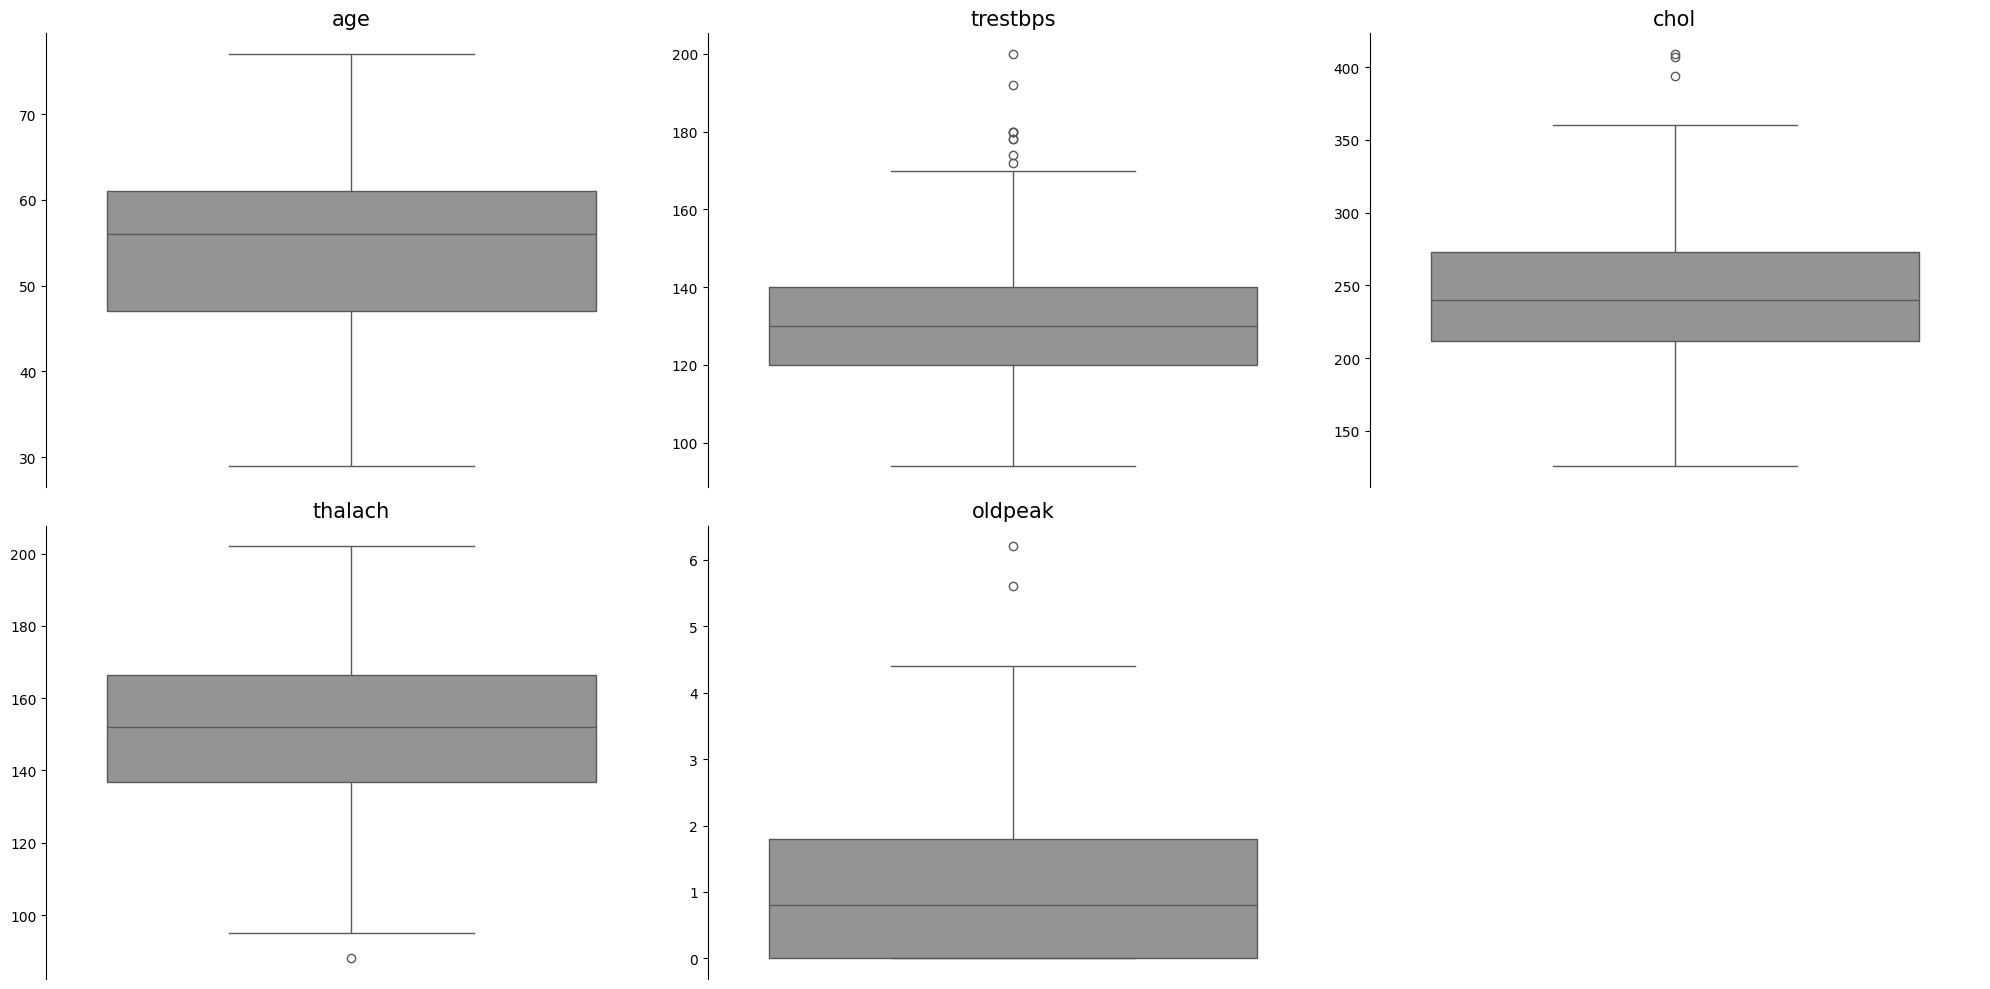

In [33]:
num_vars = len(numerical_features)
num_cols = 3 
num_rows = (num_vars // num_cols) + (1 if num_vars % num_cols != 0 else 0)

# Criando uma figura com subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

# Loop para plotar cada variável categórica
for num, feature in enumerate(numerical_features):
    sns.boxplot(y=feature, data=X_train, ax=axes[num],color='#949494')
    axes[num].set_title(f'{feature}',fontsize= 15)
    axes[num].set_xlabel("")
    axes[num].set_ylabel("")
    axes[num].spines["top"].set_visible(False) 
    axes[num].spines["right"].set_visible(False) 
    axes[num].spines["bottom"].set_visible(False) 
    axes[num].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
     

    # for bar in axes[num].patches:
    #     count = bar.get_width()
    #     x = count + 0.5  # Centralizar o rótulo na barra
    #     y = bar.get_y() + bar.get_height() / 2  # Centralizar o rótulo verticalmente
    #     axes[num].text(x, y, f'{int(count)}', ha='left', va='center', fontsize=12, color='black',fontweight='bold')    

# Removendo gráficos vazios
for i in range(num_vars, len(axes)):  
    axes[i].axis("off")

plt.tight_layout()
plt.show() 

## Observações :
- Não parece haver problema com muitos outliers, por isso vou manter.

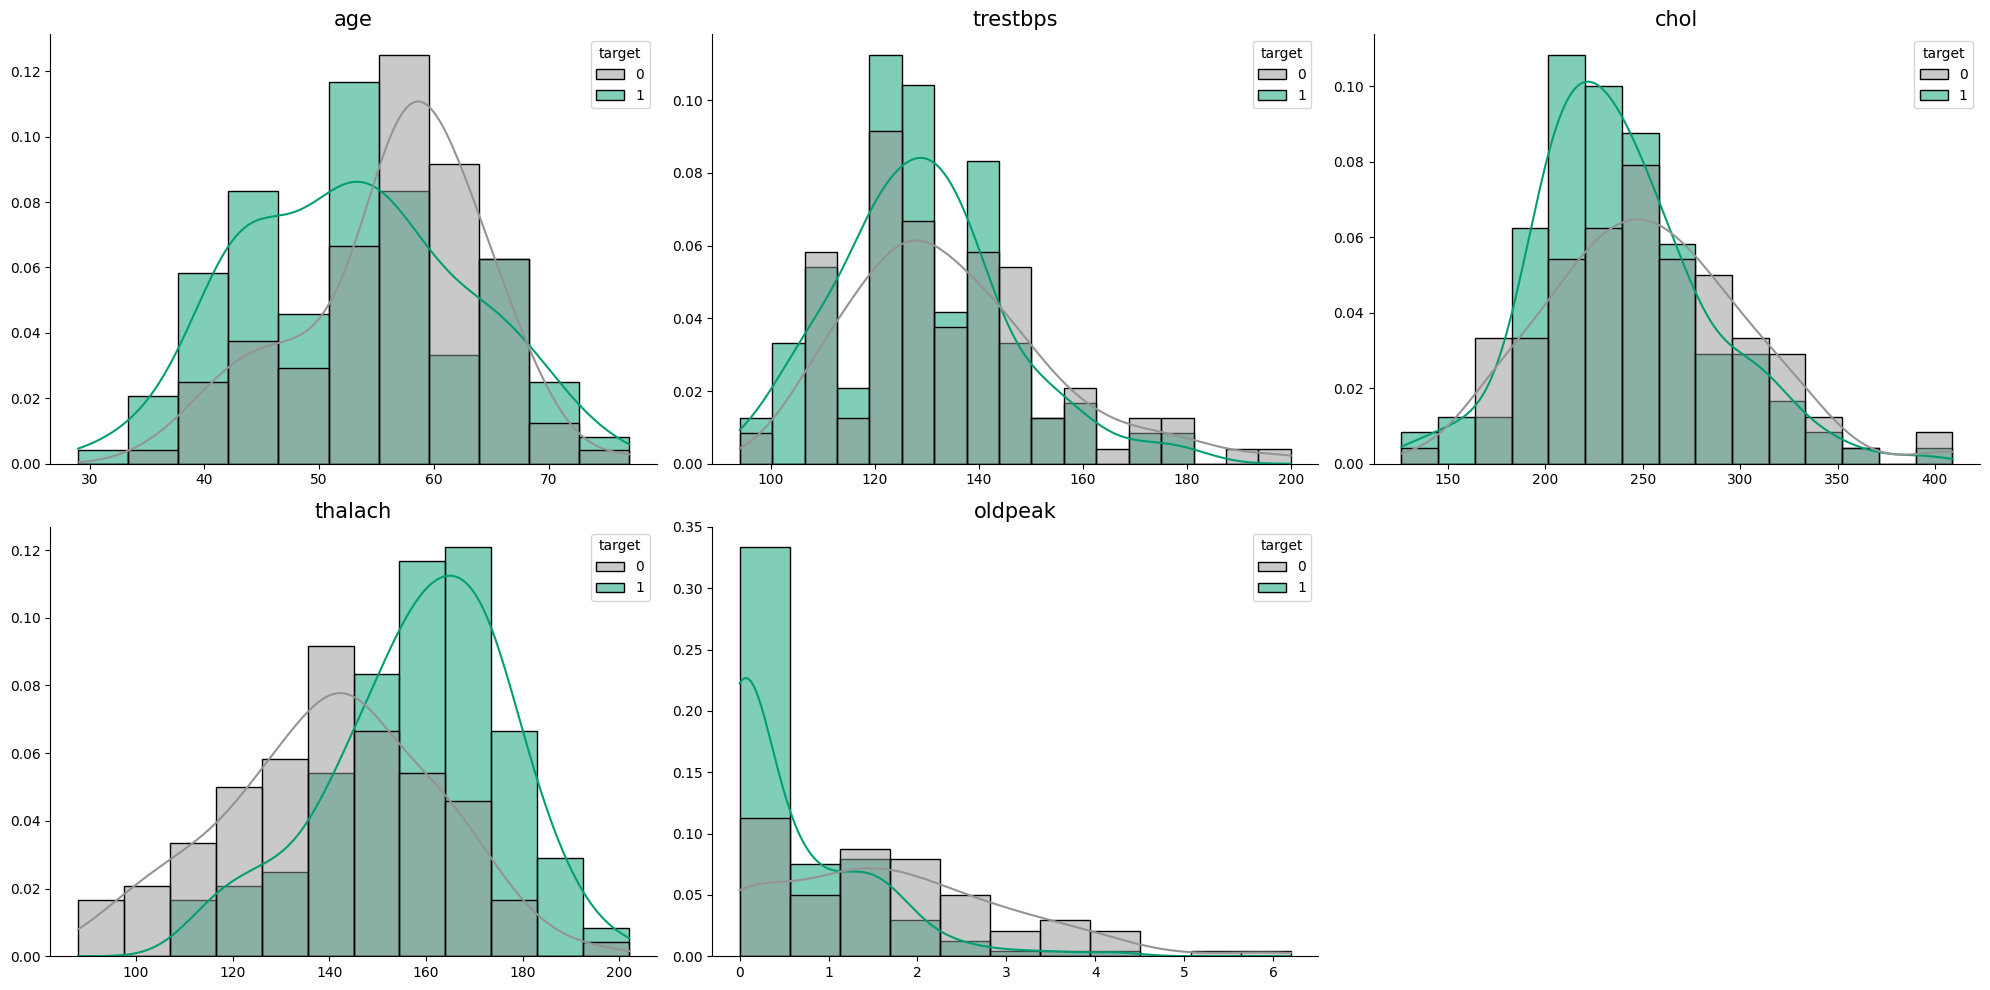

In [ ]:
num_vars = len(numerical_features)
num_cols = 3 
num_rows = (num_vars // num_cols) + (1 if num_vars % num_cols != 0 else 0)

# Criando uma figura com subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

# Loop para plotar cada variável categórica
for num, feature in enumerate(numerical_features):
    sns.histplot(x=feature, data=df_train,hue='target', ax=axes[num],stat='proportion',palette=['#949494','#029E73'],kde=True)
    axes[num].set_title(f'{feature}',fontsize= 15)
    axes[num].set_xlabel("")
    axes[num].set_ylabel("")
    axes[num].spines["top"].set_visible(False) 
    axes[num].spines["right"].set_visible(False) 
         
# Removendo gráficos vazios
for i in range(num_vars, len(axes)):  
    axes[i].axis("off")

plt.tight_layout()
plt.show() 

In [12]:
for num, feature in enumerate(numerical_features):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1


    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR


    outliers = df[(df[feature] < limite_inferior) | (df[feature] > limite_superior)]

    percentual_outliers = (len(outliers) / len(df)) * 100
    print(f'Percentual de outliers {feature} (IQR): {percentual_outliers:.2f}%')

Percentual de outliers age (IQR): 0.00%
Percentual de outliers trestbps (IQR): 2.99%
Percentual de outliers chol (IQR): 1.66%
Percentual de outliers thalach (IQR): 0.33%
Percentual de outliers oldpeak (IQR): 1.66%


## Observação:
- Os pacientes com a doença parecem ter idade menor do que a gente possa pensar, estão mais voltados para idades menores que 55 anos.
- A pressão arterial não aparenta ser um fator importante para decidir entre uma outra classe.
- Pacientes com problema no coração parecem ter parecem ter uma tedência a ter um colesterol menor que 250
- A frequência cardíaca parece ser mais alta nesses pacientes também.
- A também parece possuir um oldpeak igual a 0.
- Serão mantidos os outliers pois são poucos.

# Algumas perguntas a serem feitas:

-`1. Existe diferença na ocorrência de ataques cardíacos entre homens e mulheres? Além disso, existe diferença na faixa etária?`

-`2. Quais tipos de dor no peito são mais comuns entre os pacientes com doença cardíaca?`

-`3. A pressão arterial em repouso está associada à doença cardíaca?`

-`4. O colesterol alto aumenta significativamente o risco da doença?`

-`5. A inclinação do segmento ST (slope) afeta a identificação de doença cardíaca?`

-`6. A frequência cardíaca máxima atingida (thalach) tem relação com a presença da doença?`

-`7. Quais variáveis têm maior correlação com a ocorrência de ataques cardíacos?`

-`8. A variável "thal" (talassemia) tem relação com a presença de doença cardíaca?`

-`9. Consigo construir um modelo para prever se o paciente terá ou não ataque do coração?`



# 1. Existe diferença na ocorrência de ataques cardíacos entre homens e mulheres? Além disso, existe diferença na faixa etária?


In [17]:
# Agrupando pelo gênero e somando a quantidade de pessoas que tiveram caso
df_heart_atck_by_gender = df.groupby('sex')['target'].sum()

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
import pandas as pd

# Criando as faixas etárias corretamente como categoria ordenada
df['age_grp'] = pd.cut(df['age'], bins=range(25, 80, 5), right=False)

# Agrupando por faixa etária e sexo
df_occurrences_by_age_and_gender = df[df['target']==1].groupby(['sex', 'age_grp'], observed=True)['target'].sum().reset_index()

# Manter 'age_grp' como uma categoria ordenada
df_occurrences_by_age_and_gender['age_grp'] = df_occurrences_by_age_and_gender['age_grp'].astype(pd.CategoricalDtype(ordered=True))

# Ordenar corretamente primeiro pelo sexo e depois pela faixa etária
df_occurrences_by_age_and_gender.sort_values(by=['sex', 'age_grp'], ascending=[False, True], inplace=True)

df_occurrences_by_age_and_gender['age_grp'] =  df_occurrences_by_age_and_gender['age_grp'].astype(str)
df_occurrences_by_age_and_gender


,sex,age_grp,target
9,1,"[25, 30)",1
10,1,"[30, 35)",1
11,1,"[35, 40)",3
12,1,"[40, 45)",21
13,1,"[45, 50)",11
14,1,"[50, 55)",23
15,1,"[55, 60)",18
16,1,"[60, 65)",7
17,1,"[65, 70)",5
18,1,"[70, 75)",1


In [20]:
df_occurrences_by_age_and_gender.dtypes

sex         int64
age_grp    object
target      int64
dtype: object

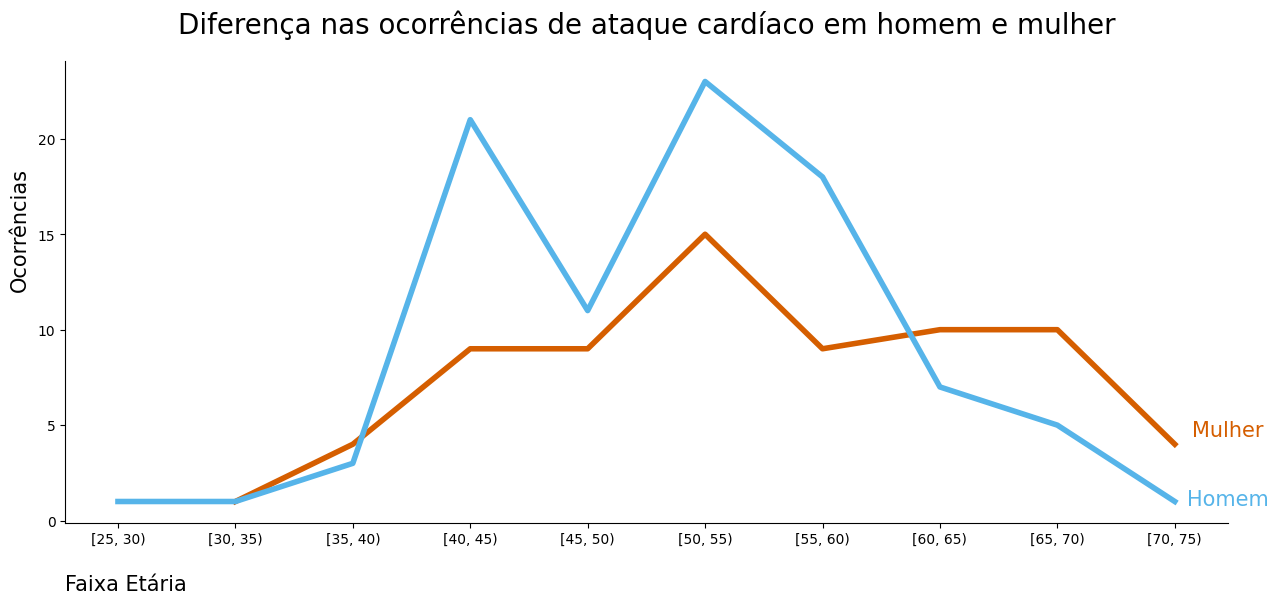

In [21]:
# Construindo o gráfico
plt.figure(figsize=(15, 6))

ax = sns.lineplot(y='target',x='age_grp',hue='sex',data=df_occurrences_by_age_and_gender,linewidth=4,palette=['#D55E00','#56B4E9'])
ax.set_ylabel('Ocorrências', fontsize=15,labelpad = 20, verticalalignment='top', horizontalalignment='left')
ax.set_xlabel('Faixa Etária', fontsize=15,labelpad = 20, loc='left')
ax.set_title('Diferença nas ocorrências de ataque cardíaco em homem e mulher',fontsize= 20, pad = 20,horizontalalignment='center')

# Removendo linhas de grade para maior clareza
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 

ax.legend().set_visible(False)
ax.text(1, 0.20, "Mulher", ha='center', va='center', transform=ax.transAxes, fontsize=15, color='#D55E00')
ax.text(1, 0.05, "Homem", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#56B4E9')
plt.show()

In [11]:
z_scores = stats.zscore(df_occurrences_by_age_and_gender['Heart_Attack'])

# Filtrar outliers
outliers = df_occurrences_by_age_and_gender[np.abs(z_scores) > 2]  # Usando 2 como o limite

print("Outliers detectados:")
print(outliers)

Outliers detectados:
    Gender Age_Group  Heart_Attack
0   Female  (10, 15]           219
10    Male  (10, 15]           216


## Conclusões:
Parece ser uma doença mais comum em homens, principalmente entre 30 e 60 anos, há um pico em mulheres também porém bem mais em homens.

# 2. Quais tipos de dor no peito são mais comuns entre os pacientes com doença cardíaca?

In [189]:
# Contar ataques cardíacos e não ataques cardíacos por cp
heart_attack_counts = df_train[df_train['target']==1]['cp'].value_counts(normalize=True)
no_heart_attack_counts = df_train[df_train['target']==0]['cp'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T

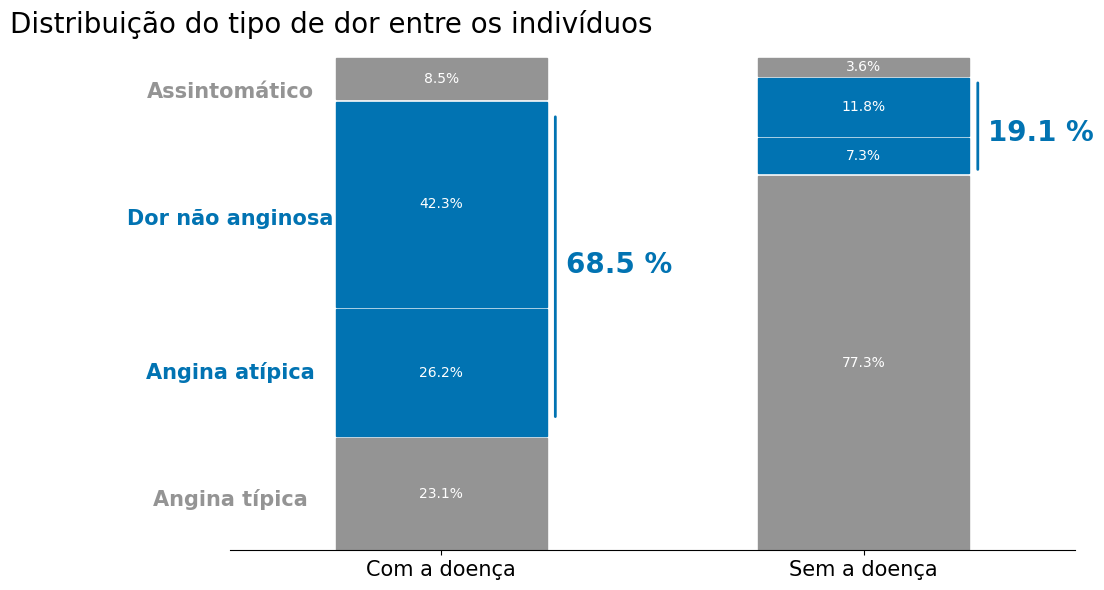

In [193]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6),legend=False)
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Distribuição do tipo de dor entre os indivíduos',fontsize=20,horizontalalignment='right')
plt.subplots_adjust(top=1)
sns.despine(left=True)

for i,container in enumerate(ax.containers):
    
    for j,bar in enumerate(container):
        bar.set_edgecolor('black')  # Cor da borda
        bar.set_linewidth(1)  # Espessura da borda
        if i==0 or i == 3:
            bar.set_color('#949494')
        else:
            bar.set_color('#0173B2')
        if bar.get_height() > 0:
            bar.set_y(bar.get_y() + i * 0.005)
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Indicando no gráfico
ax.annotate('',xy=(0.27,0.90), 
                xytext=(0.27,0.27),
                arrowprops=dict(color='#0173B2',linewidth=2,arrowstyle='-'),ha='center')
ax.text(0.46, 0.56, "68.5 %", ha='center', va='center', transform=ax.transAxes, fontsize=20, color ='#0173B2',fontweight='heavy')

ax.annotate('',xy=(1.27,0.97), 
                xytext=(1.27,0.78),  # Colocando o texto acima da barra
                arrowprops=dict(color='#0173B2',linewidth=2,arrowstyle='-'),ha='center')
ax.text(0.96, 0.82, "19.1 %", ha='center', va='center', transform=ax.transAxes, fontsize=20, color ='#0173B2',fontweight='heavy')

# Nomeando as categorias
ax.text(0, 0.90, "Assintomático", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#949494',fontweight='heavy')
ax.text(0, 0.65, "Dor não anginosa", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#0173B2',fontweight='heavy')
ax.text(0, 0.35, "Angina atípica", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#0173B2',fontweight='heavy')
ax.text(0, 0.10, "Angina típica", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#949494',fontweight='heavy')


plt.tight_layout()
plt.show()

## Conclusões:
- Podemos observar que há uma diferença grande entre entre os indíviduos que apresentaram angina atípica e dor não nao anginosa, entre os aqueles indivíduos que não obtiveram a doença e os que tiveram, isso pode indicar uma possível característica comum entre os pacientes doentes, o seu nível de dor no peito. Acredito que o `cp` talvez não precise ser codificado como um atributo cardinal, por conta do valor 4 representar assintomático, e dor não angínica. Além disso a dor mais comum entre as pessoas doentes é uma dor não anginosa.

# 3. A pressão arterial em repouso está associada à doença cardíaca?

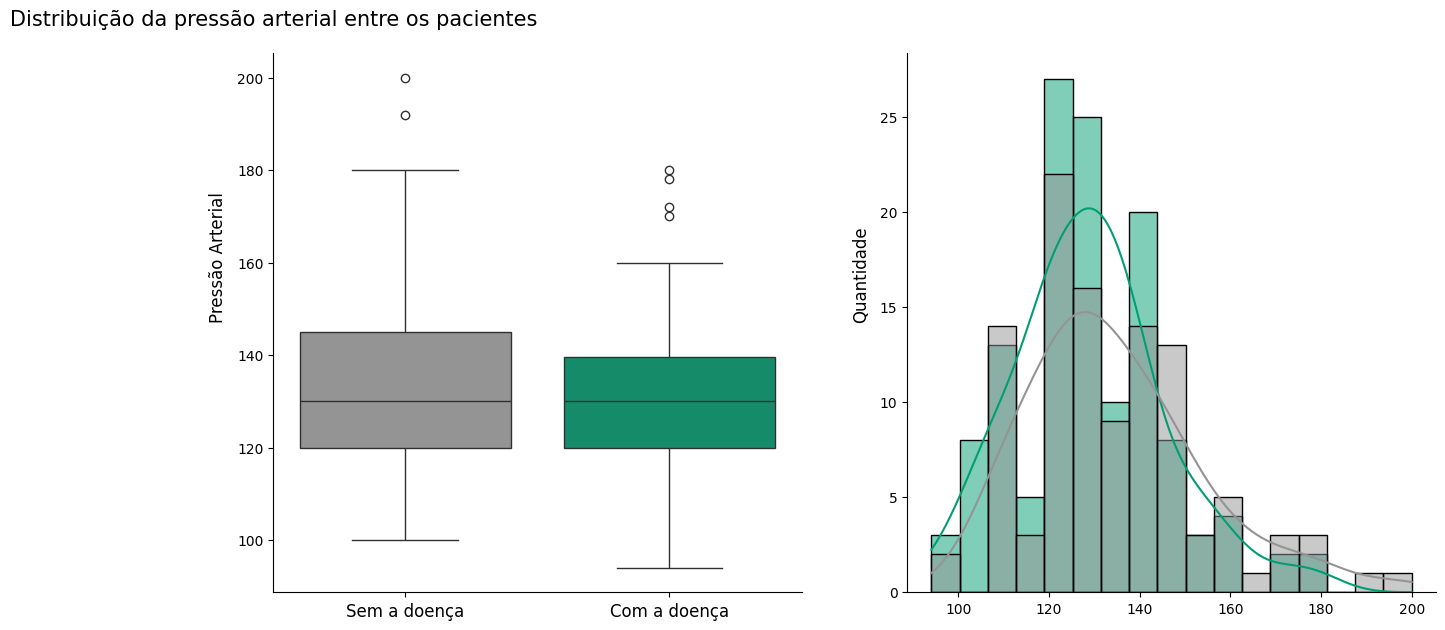

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
ax = sns.boxplot(x='target',y='trestbps',data=df_train, hue='target',palette=['#949494','#029E73'],ax=axes[0])
ax2 = sns.histplot(x='trestbps', data=df_train,hue='target', ax=axes[1],palette=['#949494','#029E73'],kde=True,legend=False)
ax.legend().set_visible(False)
ax.set_title('Distribuição da pressão arterial entre os pacientes', fontsize= 15,horizontalalignment='right',pad = 20)
ax.set_xticks(range(2),['Sem a doença','Com a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_ylabel('Pressão Arterial',fontsize=12, verticalalignment='top', horizontalalignment='left',labelpad= 20)
ax.set_xlabel("")

ax2.set_ylabel('Quantidade',fontsize=12, verticalalignment='top', horizontalalignment='left',labelpad= 20)
ax2.set_xlabel("")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

In [16]:
df_trestbps_disease = df_train[df_train['target'] == 1]['trestbps']
df_trestbps_not_disease = df_train[df_train['target'] == 0]['trestbps']

In [17]:
import scipy.stats as stats

def check_normality(data):
    """Realiza o Teste de Shapiro-Wilk para normalidade."""
    
    test_stat, p_value = stats.shapiro(data)  # Teste de normalidade
    print(f"p-valor: {p_value:.4f}")
    
    if p_value < 0.05:
        print("🔴 Rejeita H₀: Os dados NÃO são normalmente distribuídos.")
    else:
        print("🟢 Falhou em rejeitar H₀: Os dados PODEM ser normalmente distribuídos.")



def check_mann_whitney(group1, group2):
    """
    Realiza o Teste de Mann-Whitney U para comparar se as distribuições de dois grupos são diferentes.
    """
    test_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')  # Teste bilateral

    print(f"p-valor: {p_value:.4f}")

    if p_value < 0.05:
        print("🔴 Rejeita H₀: As distribuições dos grupos são diferentes.")
    else:
        print("🟢 Falhou em rejeitar H₀: Não há evidência de que as distribuições sejam diferentes.")



In [18]:
check_normality(df_trestbps_disease.to_list())
check_normality(df_trestbps_not_disease.to_list())

p-valor: 0.0079
🔴 Rejeita H₀: Os dados NÃO são normalmente distribuídos.
p-valor: 0.0002
🔴 Rejeita H₀: Os dados NÃO são normalmente distribuídos.


In [219]:
check_mann_whitney(df_trestbps_disease.to_list(),df_trestbps_not_disease.to_list())

p-valor: 0.0563
🟢 Falhou em rejeitar H₀: Não há evidência de que as distribuições sejam diferentes.



## Conclusões :
- Não parece haver evidência de que a pressão arterial em repouse represente um fator determinante para quem tem ou não a doença, o que vai um pouco contra o que a gente pensa sobre, isso pode ser por conta de poucos dados.

# 4. O colesterol alto aumenta significativamente o risco da doença?

In [ ]:
df_by_region = df.loc[df['Heart_Attack'],'Region']

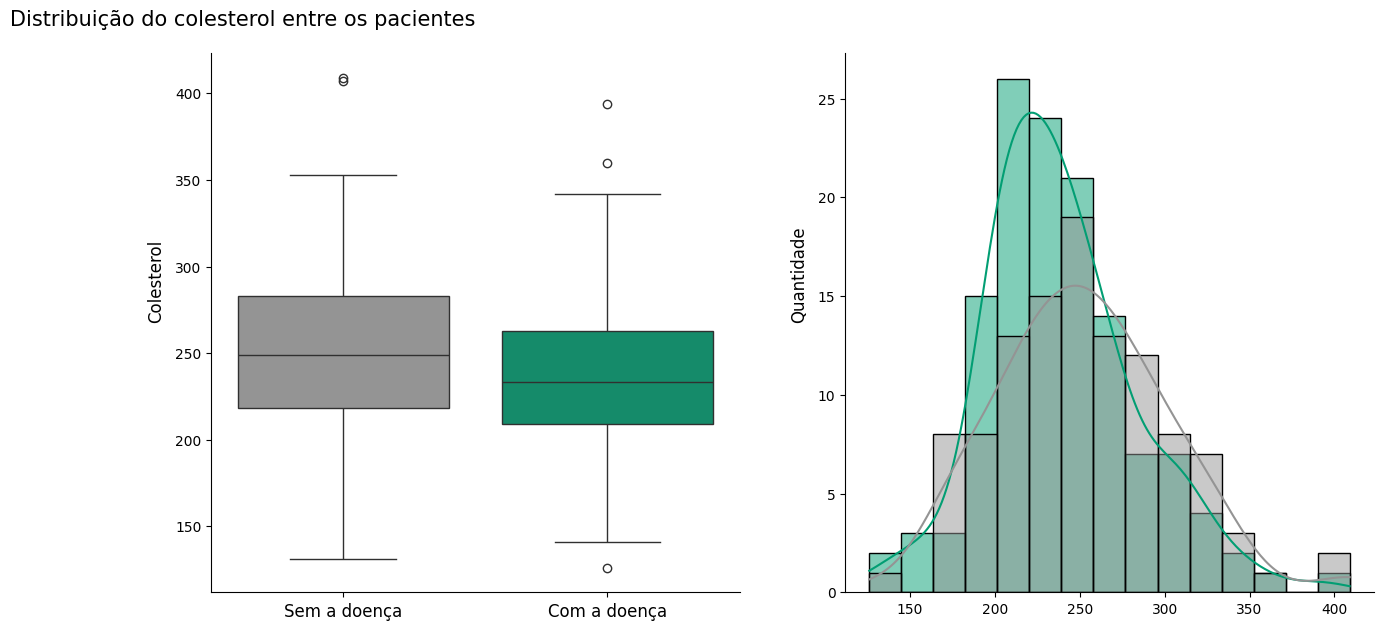

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
ax = sns.boxplot(x='target',y='chol',data=df_train, hue='target',palette=['#949494','#029E73'],ax = axes[0])
ax2 = sns.histplot(x='chol', data=df_train,hue='target', ax=axes[1],palette=['#949494','#029E73'],kde=True,legend=False)
sns.despine(top=True)
ax.legend().set_visible(False)
ax.set_title('Distribuição do colesterol entre os pacientes', fontsize= 15,horizontalalignment='right',pad = 20)
ax.set_xticks(range(2),['Sem a doença','Com a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_ylabel('Colesterol',fontsize=12, verticalalignment='top', horizontalalignment='left',labelpad= 20)
ax.set_xlabel("")


ax2.set_ylabel('Quantidade',fontsize=12, verticalalignment='top', horizontalalignment='left',labelpad= 20)
ax2.set_xlabel("")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

In [19]:
df_trestbps_disease = df_train[df_train['target'] == 1]['chol']
df_trestbps_not_disease = df_train[df_train['target'] == 0]['chol']

In [20]:
check_normality(df_trestbps_disease.to_list())
check_normality(df_trestbps_not_disease.to_list())

p-valor: 0.0042
🔴 Rejeita H₀: Os dados NÃO são normalmente distribuídos.
p-valor: 0.3195
🟢 Falhou em rejeitar H₀: Os dados PODEM ser normalmente distribuídos.


In [21]:
check_mann_whitney(df_trestbps_disease.to_list(),df_trestbps_not_disease.to_list())

p-valor: 0.0205
🔴 Rejeita H₀: As distribuições dos grupos são diferentes.


## Conclusões:
- Parece haver diferença nas distribuições, o comportamento das pessoas que aprensentaram a doença atinge um pico maior entre 200 e 250. Além disso não parece haver um número de casos maior quando há aumento do colesterol.

# 5. A inclinação do segmento ST (slope) afeta a identificação de doença cardíaca?

In [55]:
# Contar ataques cardíacos e não ataques cardíacos por slope
heart_attack_counts = df_train[df_train['target']==1]['slope'].value_counts(normalize=True)
no_heart_attack_counts = df_train[df_train['target']==0]['slope'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T

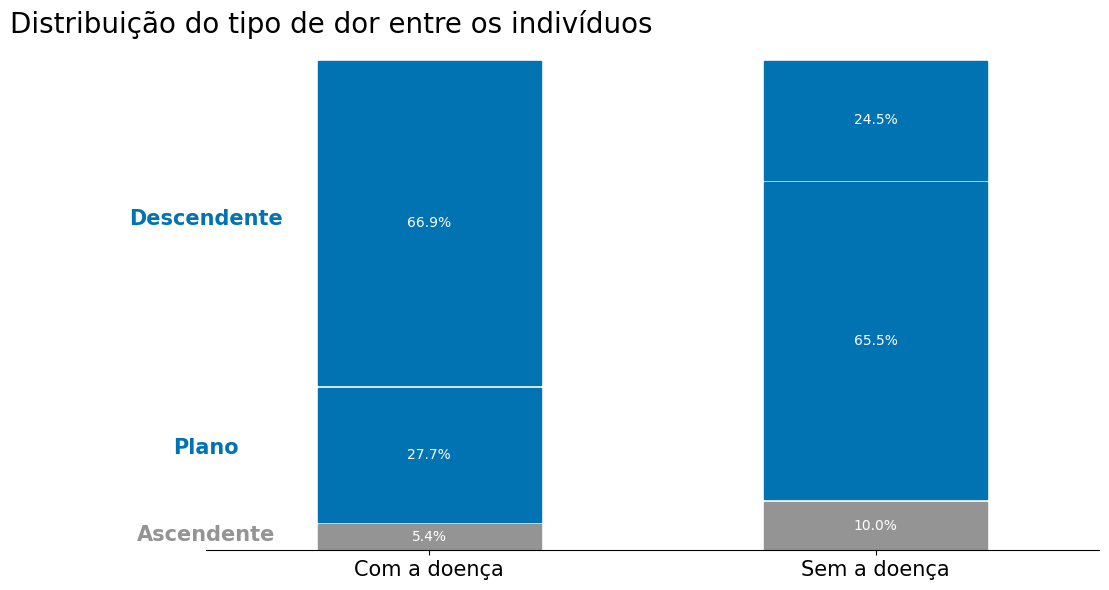

In [ ]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6),legend=False)
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Distribuição do tipo de inclinação entre os indivíduos',fontsize=20,horizontalalignment='right')
plt.subplots_adjust(top=1)
sns.despine(left=True)

for i,container in enumerate(ax.containers):
    
    for j,bar in enumerate(container):
        bar.set_edgecolor('black')  # Cor da borda
        bar.set_linewidth(1)  # Espessura da borda
        if i==0 or i == 3:
            bar.set_color('#949494')
        else:
            bar.set_color('#0173B2')
        if bar.get_height() > 0:
            bar.set_y(bar.get_y() + i * 0.005)
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')


# Nomeando as categorias
ax.text(0, 0.65, "Descendente", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#0173B2',fontweight='heavy')
ax.text(0, 0.20, "Plano", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#0173B2',fontweight='heavy')
ax.text(0, 0.03, "Ascendente", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#949494',fontweight='heavy')


plt.tight_layout()
plt.show()

## Conclusões :
- Parece haver uma inversão entre entre as categorias `Descendente` e `Plano` ,comparando entre os grupos, os "Com a doença" apresentaram 66.9% de inclinação descendente e 27.7% para inclinação plana, enquanto que para o grupo "Sem a doença", foi 25.5% para descendente e 65.5% para plano.

# 6. A frequência cardíaca máxima atingida (thalach) tem relação com a presença da doença?

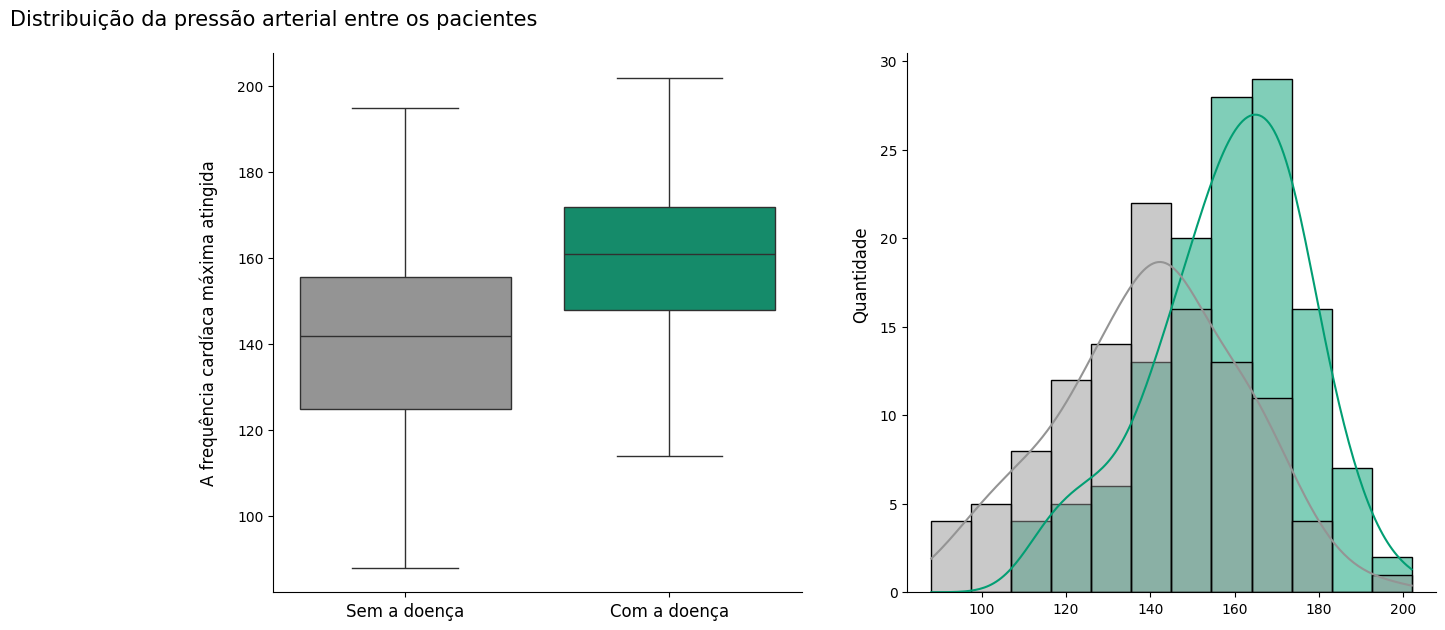

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
ax = sns.boxplot(x='target',y='thalach',data=df_train, hue='target',palette=['#949494','#029E73'],ax=axes[0])
ax2 = sns.histplot(x='thalach', data=df_train,hue='target', ax=axes[1],palette=['#949494','#029E73'],kde=True,legend=False)
ax.legend().set_visible(False)
ax.set_title('Distribuição da frequência cardiaca entre os pacientes', fontsize= 15,horizontalalignment='right',pad = 20)
ax.set_xticks(range(2),['Sem a doença','Com a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_ylabel('A frequência cardíaca máxima atingida',fontsize=12, verticalalignment='center', horizontalalignment='center',labelpad= 20)
ax.set_xlabel("")

ax2.set_ylabel('Quantidade',fontsize=12, verticalalignment='top', horizontalalignment='left',labelpad= 20)
ax2.set_xlabel("")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


In [79]:
check_normality(df_trestbps_disease.to_list())
check_normality(df_trestbps_not_disease.to_list())

p-valor: 0.0042
🔴 Rejeita H₀: Os dados NÃO são normalmente distribuídos.
p-valor: 0.3195
🟢 Falhou em rejeitar H₀: Os dados PODEM ser normalmente distribuídos.


In [80]:
check_mann_whitney(df_trestbps_disease.to_list(),df_trestbps_not_disease.to_list())

p-valor: 0.0205
🔴 Rejeita H₀: As distribuições dos grupos são diferentes.


## Conclusões :
- Neste caso sendo diferentemente do que a gente viu com o colesterol, uma pressão maior parece sim, aumentar a chance da doença.

In [ ]:
# Contar ataques cardíacos e não ataques cardíacos por slope
heart_attack_counts = df_train[df_train['target']==1]['thal'].value_counts(normalize=True)
no_heart_attack_counts = df_train[df_train['target']==0]['thal'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T

In [ ]:
# Removendo o grupo que tem apenas duas ocorrências
stacked_data.drop(columns=[0],inplace=True)
stacked_data

In [ ]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6),legend=False)
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Distribuição dos defeitos na produção de hemoglobina nos pacientes',fontsize=20,horizontalalignment='center')
plt.subplots_adjust(top=1)
sns.despine(left=True)

for i,container in enumerate(ax.containers):
    
    for j,bar in enumerate(container):
        bar.set_edgecolor('black')  # Cor da borda
        bar.set_linewidth(1)  # Espessura da borda
        if i==0 or i == 3:
            bar.set_color('#949494')
        else:
            bar.set_color('#0173B2')
        if bar.get_height() > 0:
            bar.set_y(bar.get_y() + i * 0.005)
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')


# Nomeando as categorias
ax.text(0, 0.87, "Defeito reversível", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#0173B2',fontweight='heavy')
ax.text(0, 0.42, "Defeito fixo", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#0173B2',fontweight='heavy')
ax.text(0, 0.03, "Normal", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#949494',fontweight='heavy')


plt.tight_layout()
plt.show()

## Conclusões :
- Assim como em "slope", parece haver uma inversão entre as categorias `Defeito reversível` e `Defeito fixo`.

# 7. Quais variáveis (idade, pressão arterial, colesterol, etc.) têm maior correlação com a ocorrência de ataques cardíacos?

In [15]:
corr_matrix = pd.concat([df_train["target"],df_train[numerical_features]],axis=1).corr(numeric_only= True)

In [16]:
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
thalach     0.426699
chol       -0.142167
trestbps   -0.146461
age        -0.198789
oldpeak    -0.437381
Name: target, dtype: float64

In [17]:
corr_matrix['target'].index

Index(['target', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

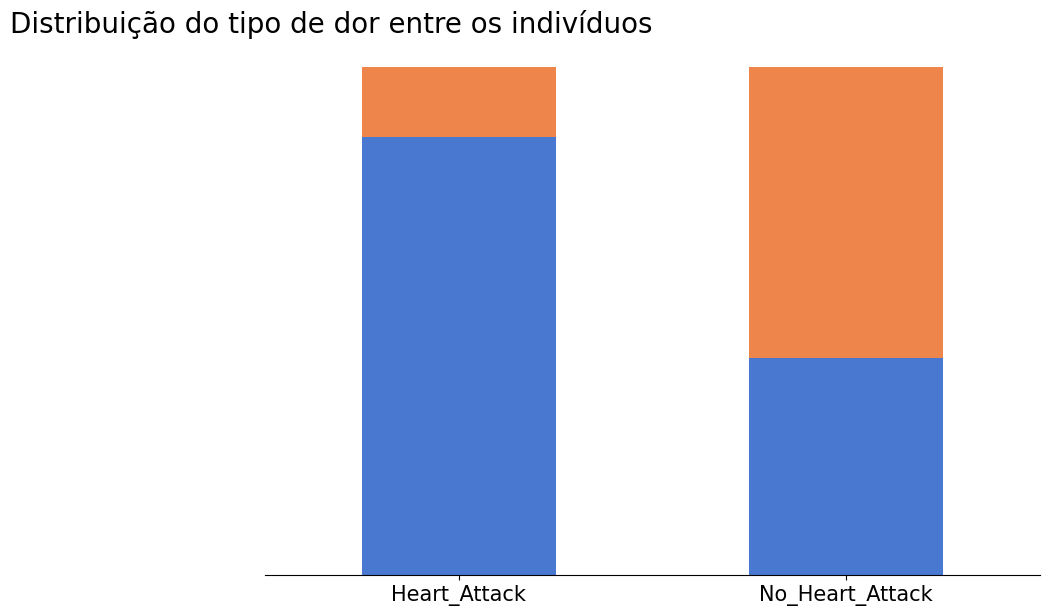

In [18]:
heart_attack_counts = df_train[df_train['target']==1]['exang'].value_counts(normalize=True)
no_heart_attack_counts = df_train[df_train['target']==0]['exang'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T

ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6),legend=False)
ax.grid(False)
ax.yaxis.set_visible(False)
#ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Distribuição do tipo de dor entre os indivíduos',fontsize=20,horizontalalignment='right')
plt.subplots_adjust(top=1)
sns.despine(left=True)

In [37]:
df_train[df["target"]==1]["oldpeak"].mean()

C:\Windows\Temp\ipykernel_18992\131756844.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[df["target"]==1]["oldpeak"].mean()


np.float64(0.6023076923076923)

In [38]:

df_train[df["target"]==0]["oldpeak"].mean()

C:\Windows\Temp\ipykernel_18992\136448546.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[df["target"]==0]["oldpeak"].mean()


np.float64(1.6590909090909094)

In [19]:
corr_matrix

,target,age,trestbps,chol,thalach,oldpeak
target,1.000000,-0.198789,-0.146461,-0.142167,0.426699,-0.437381
age,-0.198789,1.000000,0.315822,0.207265,-0.399840,0.172539
trestbps,-0.146461,0.315822,1.000000,0.197153,-0.066780,0.202559
chol,-0.142167,0.207265,0.197153,1.000000,-0.051186,0.048424
thalach,0.426699,-0.399840,-0.066780,-0.051186,1.000000,-0.378688
oldpeak,-0.437381,0.172539,0.202559,0.048424,-0.378688,1.000000


<Axes: >

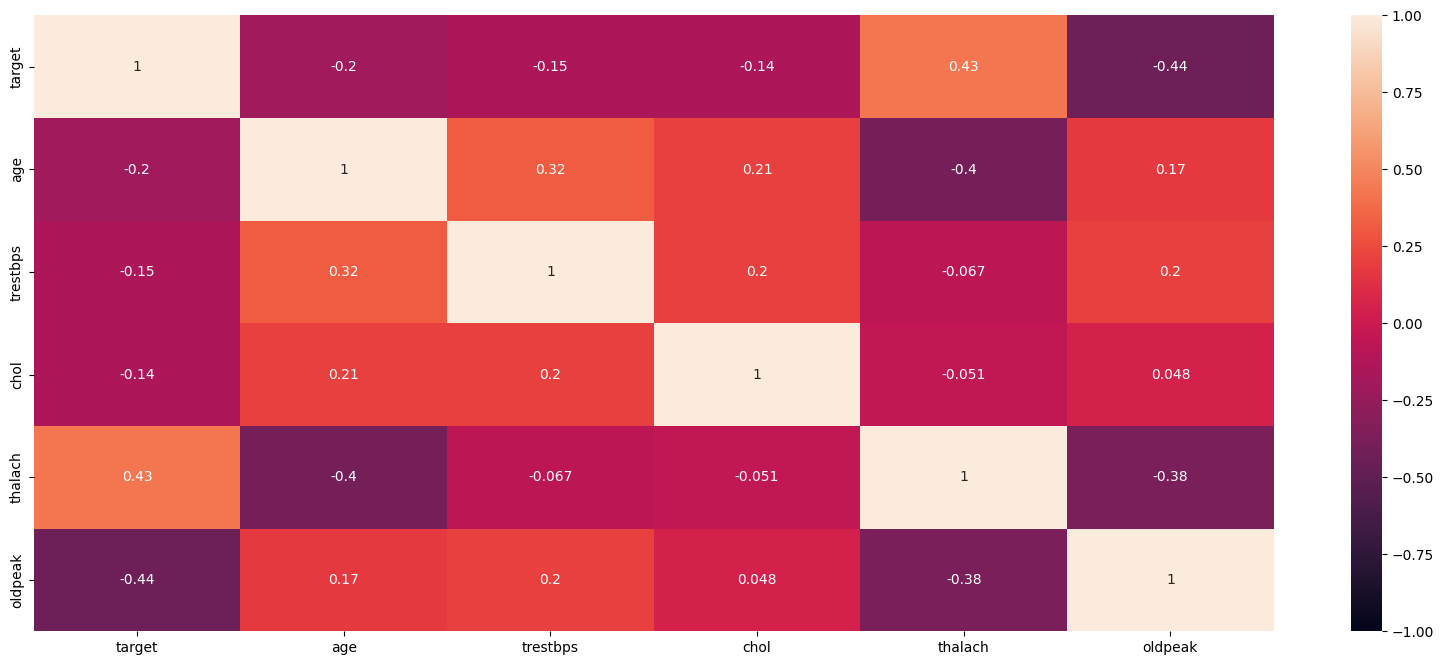

In [20]:
plt.figure(figsize=(20,8))
sns.heatmap(data=corr_matrix,vmin=-1,vmax=1,annot=True)

## Conclusões:

- Parece que há uma relação moderada entre `thalach` e a classe alvo, ou seja, a frequência cardíaca tende a aumentar nas pessoas que tem a doença, o que já era esperado de pessoas com problemas cardíacos

- Há uma moderada relação negativa entre `oldpeak` e o alvo também, nesse caso ele normalmente medido em mV, da diferença de elevação ou depressão do segmento ST do ECG após o esforço máximo (pico), valores altos teriam maior tendência a ter problemas cardiovasculares, mas esses dados mostraram uma tendência contrária. A depressão do segmento ST também tem uma relação negativa com o `thalach`, então parace haver um erro na coleta dos dados e isso prejudique a interpretabilidade de alguns modelo, por enquanto manterei essa feature.

- Também há uma correlação entre `trestbps`,pressão arterial em repouso, o que também parece não intuitivo. Por falar em idade ela tem uma correlação positiva baixa com o colesterol (`chol`), nesse caso já era de se esperar. Além disso, a idade possui uma correlação negativa com `thalach`, pessoas com menos idade apresentaram maior frequencia cardíaca.

Vamos olhar um pouco como essas relações se comportam abaixo:

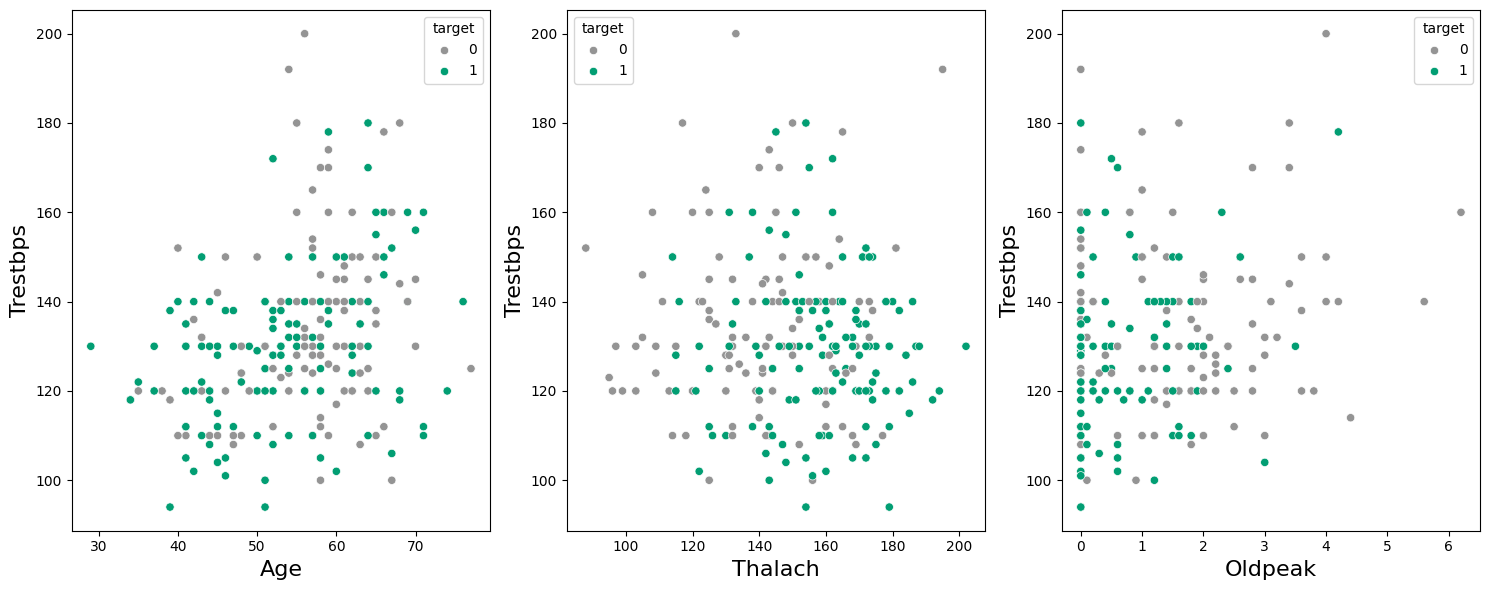

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.scatterplot(df_train, x="age", y="trestbps", hue="target", ax=axes[0], palette=['#949494', '#029E73'])
axes[0].set_xlabel("Age", fontsize=16)
axes[0].set_ylabel("Trestbps", fontsize=16)

sns.scatterplot(df_train, x="thalach", y="trestbps", hue="target", ax=axes[1], palette=['#949494', '#029E73'])
axes[1].set_xlabel("Thalach", fontsize=16)
axes[1].set_ylabel("Trestbps", fontsize=16)

sns.scatterplot(df_train, x="oldpeak", y="trestbps", hue="target", ax=axes[2], palette=['#949494', '#029E73'])
axes[2].set_xlabel("Oldpeak", fontsize=16)
axes[2].set_ylabel("Trestbps", fontsize=16)

plt.tight_layout()
plt.show()


In [23]:
df_only_numeric = df_train.select_dtypes(include=[np.number,np.bool])
for numeric_column in df_only_numeric.columns:
    coef, p = spearmanr(df['target'], df[numeric_column])
    print(f"Coluna {numeric_column} ,Spearman: coef={coef}, p={p}")
    print("*Estatisticamente significativa*\n" if p < 0.05 else "Estatísticamente não significativa\n")

Coluna age ,Spearman: coef=-0.2384000706816547, p=2.7496290024943242e-05
*Estatisticamente significativa*

Coluna sex ,Spearman: coef=-0.280936575501767, p=6.678692115314158e-07
*Estatisticamente significativa*

Coluna cp ,Spearman: coef=0.46086017547669245, p=2.444717883635235e-17
*Estatisticamente significativa*

Coluna trestbps ,Spearman: coef=-0.12159275169859758, p=0.034373728489749775
*Estatisticamente significativa*

Coluna chol ,Spearman: coef=-0.12088824156566064, p=0.0354385976875363
*Estatisticamente significativa*

Coluna fbs ,Spearman: coef=-0.028045760272712827, p=0.6267775474340544
Estatísticamente não significativa

Coluna restecg ,Spearman: coef=0.148611539362244, p=0.009581602703497604
*Estatisticamente significativa*

Coluna thalach ,Spearman: coef=0.4283698921861041, p=5.9382982745324956e-15
*Estatisticamente significativa*

Coluna exang ,Spearman: coef=-0.4367570833533031, p=1.5208138383314131e-15
*Estatisticamente significativa*

Coluna oldpeak ,Spearman: coef=-0.

In [46]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

In [47]:
df.loc[df['Heart_Attack'],'Diet'].value_counts(normalize=True)

Diet
Healthy      0.396361
Mixed        0.308281
Unhealthy    0.295358
Name: proportion, dtype: float64

In [49]:
df.loc[~df['Heart_Attack'],'Diet'].value_counts(normalize=True)

Diet
Healthy      0.395703
Mixed        0.303089
Unhealthy    0.301208
Name: proportion, dtype: float64

In [51]:
df.loc[df['Heart_Attack'],'Sleep_Hours'].mean()

np.float64(7.026441081448733)

In [52]:
df.loc[~df['Heart_Attack'],'Sleep_Hours'].mean()

np.float64(7.009467576327659)

In [57]:
df.loc[df['Heart_Attack'],'Angina'].value_counts(normalize=True)

Angina
False    0.898997
True     0.101003
Name: proportion, dtype: float64

In [58]:
df.loc[~df['Heart_Attack'],'Angina'].value_counts(normalize=True)

Angina
False    0.900904
True     0.099096
Name: proportion, dtype: float64

In [ ]:
df

In [73]:
grouped_data = df.groupby(['Cholesterol', 'Diabetes', 'Stress_Level', 'Family_History'])['Heart_Attack'].mean().reset_index()
key_risk_factors = grouped_data.sort_values('Heart_Attack', ascending=False)



print("Top 10 key risk factors contributing to heart attacks")
key_risk_factors.reset_index()

Top 10 key risk factors contributing to heart attacks


,index,Cholesterol,Diabetes,Stress_Level,Family_History,Heart_Attack
0,14142,191.0,True,3,False,1.0
1,7,23.3,False,1,False,1.0
2,2767,123.1,False,3,False,1.0
3,7228,155.9,True,4,False,1.0
4,13091,186.2,False,4,True,1.0
...,...,...,...,...,...,...
32023,3158,126.7,True,8,False,0.0
32024,56,47.2,False,4,True,0.0
32025,57,47.2,False,8,True,0.0
32026,3159,126.7,True,10,True,0.0


In [72]:
key_risk_factors.reset_index()[key_risk_factors.reset_index()['Heart_Attack']==1]

,index,Cholesterol,Diabetes,Stress_Level,Family_History,Heart_Attack
0,14142,191.0,True,3,False,1.0
1,7,23.3,False,1,False,1.0
2,2767,123.1,False,3,False,1.0
3,7228,155.9,True,4,False,1.0
4,13091,186.2,False,4,True,1.0
...,...,...,...,...,...,...
2453,30475,291.5,False,6,False,1.0
2454,4901,140.7,False,10,False,1.0
2455,30506,291.9,False,9,False,1.0
2456,30507,291.9,False,10,True,1.0


In [74]:
df.loc[df['Heart_Attack'],'Cholesterol'].value_counts(normalize=True)

Cholesterol
212.4    0.002211
196.0    0.002040
177.7    0.002040
206.3    0.001870
199.6    0.001870
           ...   
191.5    0.000170
94.4     0.000170
331.7    0.000170
88.0     0.000170
310.0    0.000170
Name: proportion, Length: 1945, dtype: float64

# 8. A variável "thal" (talassemia) tem relação com a presença de doença cardíaca?

In [98]:
# Contar ataques cardíacos e não ataques cardíacos por slope
heart_attack_counts = df_train[df_train['target']==1]['thal'].value_counts(normalize=True)
no_heart_attack_counts = df_train[df_train['target']==0]['thal'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T

In [99]:
# Removendo o grupo que tem apenas duas ocorrências
stacked_data.drop(columns=[0],inplace=True)
stacked_data

thal,1,2,3
Heart_Attack,0.030769,0.792308,0.169231
No_Heart_Attack,0.090909,0.227273,0.681818


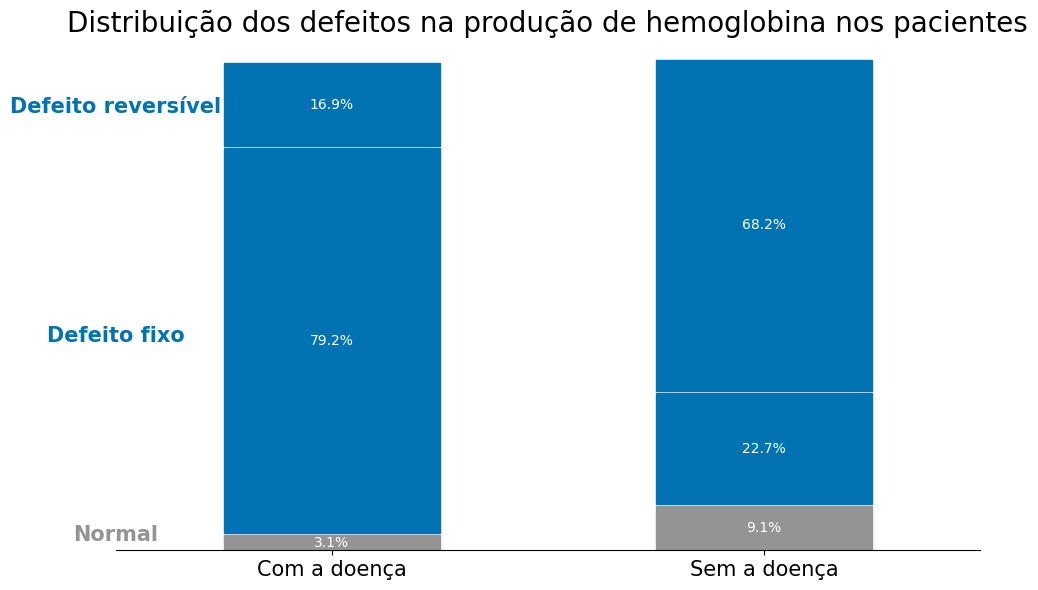

In [105]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6),legend=False)
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Distribuição dos defeitos na produção de hemoglobina nos pacientes',fontsize=20,horizontalalignment='center')
plt.subplots_adjust(top=1)
sns.despine(left=True)

for i,container in enumerate(ax.containers):
    
    for j,bar in enumerate(container):
        bar.set_edgecolor('black')  # Cor da borda
        bar.set_linewidth(1)  # Espessura da borda
        if i==0 or i == 3:
            bar.set_color('#949494')
        else:
            bar.set_color('#0173B2')
        if bar.get_height() > 0:
            bar.set_y(bar.get_y() + i * 0.005)
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')


# Nomeando as categorias
ax.text(0, 0.87, "Defeito reversível", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#0173B2',fontweight='heavy')
ax.text(0, 0.42, "Defeito fixo", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#0173B2',fontweight='heavy')
ax.text(0, 0.03, "Normal", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#949494',fontweight='heavy')


plt.tight_layout()
plt.show()

## Conclusões :
- Assim como em "slope", parece haver uma inversão entre as categorias `Defeito reversível` e `Defeito fixo`.

# 9. Consigo construir um modelo para prever se o paciente terá ou não ataque do coração?

## Feature engineering

Irá ser feito a criação das seguintes features:

- age*trestbps : A pressão arterial sistólica em idosos tende a ser mais preocupante; então, ao multiplicar idade por pressão, estamos dando mais peso para valores altos em pacientes idosos.

- chol ÷ age : colesterol tende a aumentar com a idade, então esse ajuste relativo mostra se o colesterol está alto para a idade. Um jovem com colesterol 230 é diferente de um idoso com 230.

- thalach - age : thalach (frequência cardíaca máxima) normalmente diminui com a idade. Um valor muito alto em idosos pode ser arriscado ou sinal de teste mal executado.

## Considerações sobre as categorias:

- Nas variáveis sex,cp,fbs,restcg,exang,thal serão aplicados o One-Hot enconding.
- Variável slope será utilizado o ordinal encondings, para preservar esse comportamento de proximidade.

In [26]:
ordinal_enconding = ['slope']
one_hot_enconding = ['sex','cp','fbs','restecg','exang','thal']

## Considerações sobre as variáveis numéricas:
- Vamos usar o standard scaler para escalonar nossos dados, pois alguns algoritmos são sensíveis a faixa de valores diferentes entre as features.

In [27]:
numerical_features

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [ ]:


class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df = X.copy()
        df['age_trestbps'] = df['age'] * df['trestbps']
        df['chol_per_age'] = df['chol'] / df['age']
        df['thalach_minus_age'] = df['thalach'] - df['age'] 
        return df


In [29]:
from sklearn.preprocessing import OneHotEncoder
linear_pipeline = Pipeline([
    ('feature_engineering', FeatureEngineer()), 
    ('column_transform', ColumnTransformer(
        transformers=[
            ('one_hot_encoder', OneHotEncoder(), one_hot_enconding),
            ('ordinal_encoder', OrdinalEncoder(), ordinal_enconding),
            ('std_scaler',StandardScaler(),numerical_features)
        ],
        remainder="passthrough"
    ))
])

In [30]:
X_train_prepared_linear = linear_pipeline.fit_transform(X_train,y_train)
X_train_prepared_linear.shape

(240, 27)

In [37]:
from category_encoders import TargetEncoder

tree_pipeline = Pipeline([
    ('feature_engineering', FeatureEngineer()),   
    ('column_transform', ColumnTransformer(
        transformers=[
            ('target_encoder', TargetEncoder(), one_hot_enconding),
            ('ordinal_encoder', OrdinalEncoder(), ordinal_enconding),
        ],
        remainder="passthrough"
    ))
])

In [40]:
X_train_prepared_tree = tree_pipeline.fit_transform(X_train,y_train)
X_train_prepared_tree.shape

(240, 16)

In [33]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
linear_models = {
                'Linear_SVC': LinearSVC(),
                'KNN': KNeighborsClassifier(),
                'Logistic_Regression': LogisticRegression(max_iter=10000),
                }

tree_models = {
              'Decision_Tree': DecisionTreeClassifier(),
              'Random_Forest': RandomForestClassifier(),
              }

In [37]:
from sklearn.model_selection import cross_val_score,LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

loo = LeaveOneOut()
model_cross_val = {}
model_train_val = {}

for name, model in linear_models.items():

    model.fit(X_train_prepared_linear,y_train)
    y_pred = model.predict(X_train_prepared_linear)
    f1 = f1_score(y_train,y_pred)


    scores = cross_val_score(model,X_train_prepared_linear, y_train, cv=20, scoring='f1')
    avg_cross_val = np.mean(scores)
    std_deviation = np.std(scores)
    
    model_train_val[name] = f1
    model_cross_val[name] = avg_cross_val

    print(f"Modelo : {name}\n Média do f1 score na validaçao cruzada {avg_cross_val} ± {std_deviation}\n Valor do f1 score nos dados de treino: {f1}")
    print(80*"=")


Modelo : Linear_SVC
 Média do f1 score na validaçao cruzada 0.8496896241013887 ± 0.10353478020576595
 Valor do f1 score nos dados de treino: 0.8773234200743495
Modelo : KNN
 Média do f1 score na validaçao cruzada 0.5975280356898003 ± 0.1526876043766702
 Valor do f1 score nos dados de treino: 0.7857142857142857
Modelo : Logistic_Regression
 Média do f1 score na validaçao cruzada 0.8444698438816086 ± 0.1223639424708792
 Valor do f1 score nos dados de treino: 0.8805970149253731


In [38]:
df_cross_val = pd.DataFrame(list(model_cross_val.items()), columns=['model', 'avg_val_score'])
df_train = pd.DataFrame(list(model_train_val.items()), columns=['model', 'train_score'])

df_eval = pd.merge(df_train,df_cross_val,on='model',sort=True).reset_index(drop=True)
df_eval

,model,train_score,avg_val_score
0,KNN,0.785714,0.597528
1,Linear_SVC,0.877323,0.849690
2,Logistic_Regression,0.880597,0.844470


In [39]:
df_melted = df_eval.melt(id_vars='model', var_name='Score_Type', value_name='Score')

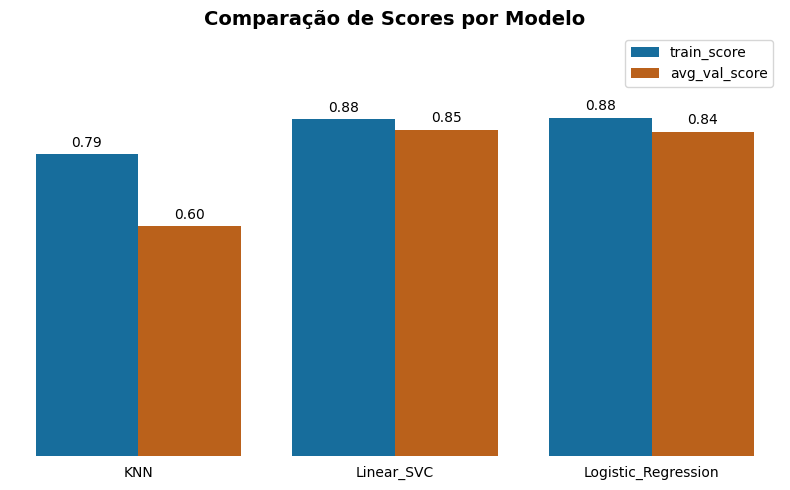

In [40]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_melted, x='model', y='Score', hue='Score_Type',palette = ['#0173B2','#D55E00'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10)

# Remove os eixos (ticks e spines)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Comparação de Scores por Modelo', fontsize=14, weight='bold')
ax.set_ylim(0, 1.1)
ax.legend(title='')

# Remove as linhas dos eixos
sns.despine(left=True, bottom=True)
ax.tick_params(left=False, bottom=False)
ax.set_yticks([])

plt.tight_layout()
plt.show()

In [41]:

from sklearn.model_selection import cross_val_score,LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
loo = LeaveOneOut()

model_cross_val = {}
model_train_val = {}

for name, model in tree_models.items():
    
    model.fit(X_train_prepared_tree,y_train)
    y_pred = model.predict(X_train_prepared_tree)
    f1 = f1_score(y_train,y_pred)

    scores = cross_val_score(model,X_train_prepared_linear, y_train, cv=20, scoring='f1')
    avg_cross_val = np.mean(scores)
    std_deviation = np.std(scores)
    
    model_train_val[name] = f1
    model_cross_val[name] = avg_cross_val

    print(f"Modelo : {name}\n Média do f1 score na validaçao cruzada {avg_cross_val} ± {std_deviation}\n Valor do f1 score nos dados de teste: {f1}")


Modelo : Decision_Tree
 Média do f1 score na validaçao cruzada 0.7647096041213688 ± 0.11285939996304374
 Valor do f1 score nos dados de teste: 1.0
Modelo : Random_Forest
 Média do f1 score na validaçao cruzada 0.8325001469119115 ± 0.1303535117510308
 Valor do f1 score nos dados de teste: 1.0


In [42]:
model_cross_val

{'Decision_Tree': np.float64(0.7647096041213688),
 'Random_Forest': np.float64(0.8325001469119115)}

In [43]:
df_cross_val = pd.DataFrame(list(model_cross_val.items()), columns=['model', 'avg_val_score'])
df_train = pd.DataFrame(list(model_train_val.items()), columns=['model', 'train_score'])

df_eval = pd.merge(df_train,df_cross_val,on='model',sort=True).reset_index(drop=True)
df_eval

,model,train_score,avg_val_score
0,Decision_Tree,1.0,0.76471
1,Random_Forest,1.0,0.83250


In [44]:
df_cross_val

,model,avg_val_score
0,Decision_Tree,0.76471
1,Random_Forest,0.83250


In [45]:
df_melted = df_eval.melt(id_vars='model', var_name='Score_Type', value_name='Score')

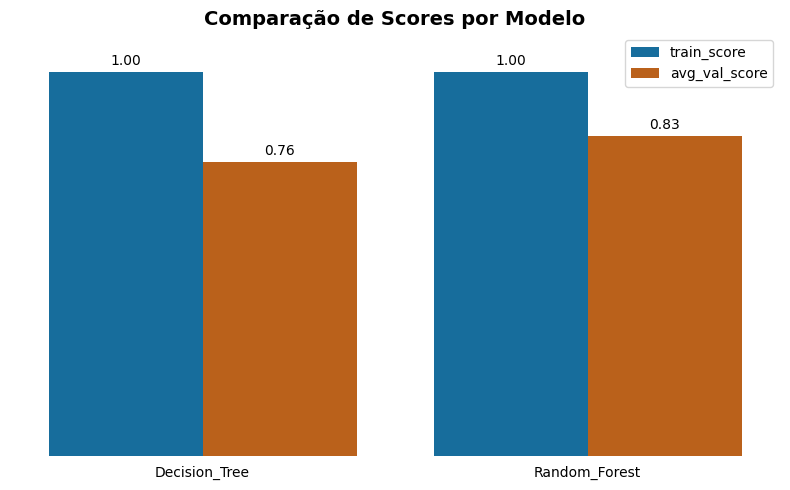

In [46]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_melted, x='model', y='Score', hue='Score_Type',palette = ['#0173B2','#D55E00'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10)

# Remove os eixos (ticks e spines)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Comparação de Scores por Modelo', fontsize=14, weight='bold')
ax.set_ylim(0, 1.1)
ax.legend(title='')

# Remove as linhas dos eixos
sns.despine(left=True, bottom=True)
ax.tick_params(left=False, bottom=False)
ax.set_yticks([])

plt.tight_layout()
plt.show()

## Considerações

Os resultados aparentam ser razoáveis, parece haver um overfitting nos modelos baseados em árvores no dados de treinamento, o KNN parece que se saiu pior, a regressão logística e o linear SVC se saíram melhor. Para a seleção de features e fine-tune do modelo eu ficarei com a regressão logística, apesar de nesse resultado o modelo SVC ter se saído um pouco melhor. Vamos ver se esse modelo conseguirá algum tipo de melhoria com a otimização dos seus hiperparametros.

## Seleção de features

Nesse caso como utilizarei a regressão logística não utilizarei técnicas como Recursive Feature Elimination para diminuir as features, por conta da própria capacidade de regularização do modelo. Com a penalidade L1, adicionará um termo de regularização que força alguns coeficientes a se tornarem exatamente zero, o que já vai eliminar algumas features menos importantes automaticamente. Enquanto que a penalidade L2, ela não vai zerar os coeficientes, mas vai reduzir sua magnitude.
Recursive Feature Elimination (RFE) é uma técnica de seleção de variáveis que visa identificar as features mais relevantes para um modelo preditivo. Ela funciona de forma recursiva: treina o modelo, avalia a importância de cada variável (com base em coeficientes ou importância de features), elimina a menos relevante e repete o processo até restar um número desejado de variáveis. Essa abordagem é especialmente útil para reduzir dimensionalidade, melhorar a generalização do modelo e aumentar a interpretabilidade, mantendo apenas os atributos mais impactantes na previsão. Eu irei utilizar o RFECV para ele encontrar o número ideal de features.

In [60]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(max_iter=10000)
cv = StratifiedKFold(n_splits=20)

selector = RFECV(estimator=model, step=1, cv=cv, scoring='f1')
selector.fit(X_train_prepared_linear, y_train)

col_transformer = linear_pipeline.named_steps['column_transform']
feature_names = col_transformer.get_feature_names_out()

# Filtra apenas as selecionadas
selected_features = feature_names[selector.support_]
print(f" tamanho {len(selected_features)} features {selected_features}")

 tamanho 16 features ['one_hot_encoder__sex_0' 'one_hot_encoder__sex_1' 'one_hot_encoder__cp_0'
 'one_hot_encoder__cp_2' 'one_hot_encoder__cp_3'
 'one_hot_encoder__restecg_1' 'one_hot_encoder__exang_0'
 'one_hot_encoder__exang_1' 'one_hot_encoder__thal_2'
 'one_hot_encoder__thal_3' 'ordinal_encoder__slope' 'std_scaler__trestbps'
 'std_scaler__chol' 'std_scaler__thalach' 'std_scaler__oldpeak'
 'remainder__ca']


In [61]:
X_selected = selector.transform(X_train_prepared_linear)

selected_feature_names = feature_names[selector.support_]

X_train_selected = pd.DataFrame(X_selected, columns=selected_feature_names, index=X_train.index)
X_train_selected

,one_hot_encoder__sex_0,one_hot_encoder__sex_1,one_hot_encoder__cp_0,one_hot_encoder__cp_2,one_hot_encoder__cp_3,one_hot_encoder__restecg_1,one_hot_encoder__exang_0,one_hot_encoder__exang_1,one_hot_encoder__thal_2,one_hot_encoder__thal_3,ordinal_encoder__slope,std_scaler__trestbps,std_scaler__chol,std_scaler__thalach,std_scaler__oldpeak,remainder__ca
59,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,-0.195114,1.221228,0.405172,-0.902639,1.0
247,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.574042,0.025865,-1.378653,-0.902639,3.0
289,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-0.195114,-0.833958,-0.921262,0.758659,1.0
288,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,-1.190264,1.892309,-0.326653,1.589308,1.0
63,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.191889,-0.875901,-0.829783,-0.902639,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,-0.084542,-0.540360,1.731606,-0.902639,0.0
126,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,-1.079692,-0.854929,-0.326653,-0.819574,0.0
25,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,1.574042,1.200257,0.542389,-0.570379,2.0
103,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.637403,-0.099963,2.006041,-0.238119,0.0


In [62]:
all_features = col_transformer.get_feature_names_out()
removed_features = all_features[~selector.support_]
print("Features removidas:", removed_features)

Features removidas: ['one_hot_encoder__cp_1' 'one_hot_encoder__fbs_0' 'one_hot_encoder__fbs_1'
 'one_hot_encoder__restecg_0' 'one_hot_encoder__restecg_2'
 'one_hot_encoder__thal_0' 'one_hot_encoder__thal_1' 'std_scaler__age'
 'remainder__age_trestbps' 'remainder__chol_per_age'
 'remainder__thalach_minus_age']


## Observações 

Houve a diminuição de 27 para 16 features, a variáveis que foram criadas nenhuma foi escolhida.

## Fine-tune

Vou utilizar o Optuna, pois é uma biblioteca de otimização eficiente que busca encontrar os melhores hiperparâmetros. Diferente do grid search, que somente testa todas as combinações possíveis de hiperparâmetros, ele aprende com os resultados anteriores para explorar melhor o espaço.

In [83]:
def objective(trial):
    # Espaço de busca dos hiperparâmetros
    C = trial.suggest_float('C', 1e-4, 1e2, log=True)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'

    # Define o modelo
    model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=10000)

    # Validação cruzada com F1
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_prepared_linear, y_train, scoring='f1', cv=cv).mean()
    
    return score.mean()

In [84]:
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Melhores hiperparâmetros:", study.best_params)
print("Melhor F1:", study.best_value)

[I 2025-06-09 13:42:02,867] A new study created in memory with name: no-name-8633ef62-4579-4807-a8bf-c7efd73caaa7
[I 2025-06-09 13:42:03,004] Trial 0 finished with value: 0.7161973875181422 and parameters: {'C': 0.0002614681952548089, 'penalty': 'l2'}. Best is trial 0 with value: 0.7161973875181422.
[I 2025-06-09 13:42:03,022] Trial 1 finished with value: 0.7225957154506488 and parameters: {'C': 0.05190026810699319, 'penalty': 'l1'}. Best is trial 1 with value: 0.7225957154506488.
[I 2025-06-09 13:42:03,136] Trial 2 finished with value: 0.7160146212976402 and parameters: {'C': 0.0002228398703295193, 'penalty': 'l2'}. Best is trial 1 with value: 0.7225957154506488.
[I 2025-06-09 13:42:03,168] Trial 3 finished with value: 0.706655994793947 and parameters: {'C': 0.00969977594458624, 'penalty': 'l1'}. Best is trial 1 with value: 0.7225957154506488.
[I 2025-06-09 13:42:03,200] Trial 4 finished with value: 0.7182818156502367 and parameters: {'C': 0.0010416336702103288, 'penalty': 'l1'}. Best

Melhores hiperparâmetros: {'C': 0.10787215055562688, 'penalty': 'l2'}
Melhor F1: 0.8600673400673401


In [85]:
best_parameters = study.best_params
best_parameters

{'C': 0.10787215055562688, 'penalty': 'l2'}

In [88]:
log_clf = LogisticRegression(**best_parameters,max_iter=10000)
log_clf.fit(X_train_prepared_linear,y_train)

LogisticRegression(C=0.10787215055562688, max_iter=10000)

In [92]:
X_test_prepared = linear_pipeline.transform(X_test)
#X_test_selected = selector.transform(X_test_prepared)
#X_test_selected = pd.DataFrame(X_test_selected,columns= selected_feature_names, index=X_test.index)
#X_test_selected.shape

In [121]:
y_pred = log_clf.predict(X_test_prepared)
heart_atck_proba = log_clf.predict_proba(X_test_prepared)[:,1]

In [ ]:
from sklearn.metrics import evalute
model_metrics = evaluate_classifier(y_test, y_pred, churn_probas)

In [ ]:
print(classification_report(y_test, y_pred))
print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

0.8450704225352113


In [97]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[20  8]
 [ 3 30]]


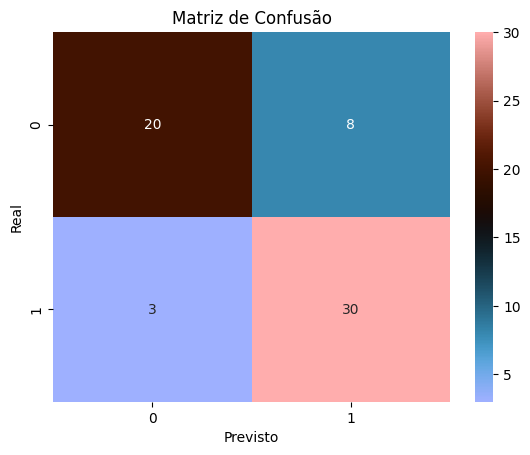

In [118]:
sns.heatmap(cm, annot=True, fmt='d', cmap='berlin')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [128]:
fpr, tpr, thresholds = roc_curve(y_pred, heart_atck_proba)
auc = roc_auc_score(y_test, heart_atck_proba)

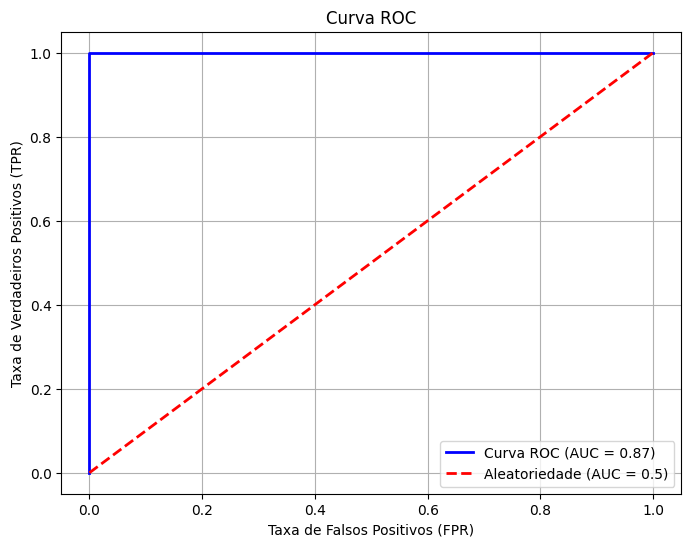

In [129]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Aleatoriedade (AUC = 0.5)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [134]:
p, r, _ = precision_recall_curve(y_test, heart_atck_proba)
pr_auc = auc(r, p)

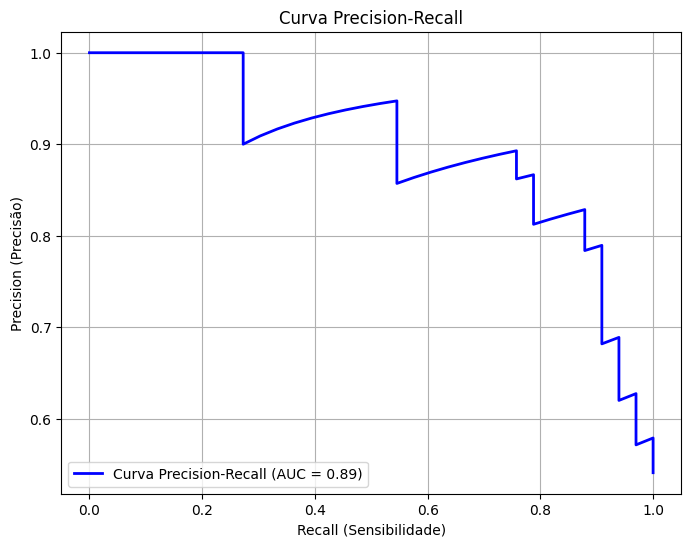

In [136]:
plt.figure(figsize=(8, 6))
plt.plot(r, p, color='blue', lw=2, label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall (Sensibilidade)')
plt.ylabel('Precision (Precisão)')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [ ]:
import pickle